In [1]:
#imports to prepare environment

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
from kmodes.kmodes import KModes

#wrangle files
import wrangle


pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#checking the wrangle.py file 
df = wrangle.acquire_prep()
df.head(3)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,socbar,socrel,socommun,socfrend,satsoc,class,satfin,quallife,partners,partnrs5
0,pisces,white,65.00,female,heterosexual or straight,married,"in a medium-size city (50,000-250,000)",new england,high school,unknown,...,unknown,unknown,unknown,unknown,fair,middle class,more or less satisfied,good,1 partner,1 partner
1,pisces,white,60.00,male,unknown,divorced,"in a large city (over 250,000)",pacific,bachelor's,refused,...,several times a month,several times a year,once or twice a week,several times a month,very good,upper class,pretty well satisfied,excellent,unknown,unknown
5,aries,black,33.00,female,unknown,never married,"in a small city or town (under 50,000)",new england,bachelor's,unknown,...,about once a month,about once a month,about once a month,about once a month,good,middle class,pretty well satisfied,good,unknown,unknown


In [3]:
df.age.value_counts().index

Float64Index([67.0, 33.0, 52.0, 59.0, 57.0, 42.0, 61.0, 63.0, 62.0, 41.0, 37.0,
              68.0, 60.0, 70.0, 69.0, 51.0, 34.0, 65.0, 74.0, 53.0, 64.0, 39.0,
              55.0, 29.0, 40.0, 35.0, 46.0, 44.0, 36.0, 30.0, 58.0, 56.0, 38.0,
              32.0, 28.0, 66.0, 75.0, 71.0, 31.0, 43.0, 47.0, 49.0, 54.0, 72.0,
              50.0, 45.0, 73.0, 48.0, 25.0, 26.0, 79.0, 24.0, 77.0, 27.0, 76.0,
              78.0, 81.0, 22.0, 23.0, 80.0, 89.0, 21.0, 84.0, 20.0, 83.0, 82.0,
              85.0, 19.0, 86.0, 87.0, 88.0, 18.0],
             dtype='float64')

In [4]:
#bringing in split function and looking at the shape of data:
train, validate, test = wrangle.split(df)

Train: 2499 rows, 66 cols
Validate: 625 rows, 66 cols
Test: 552 rows, 66 cols


In [5]:
# Count of observations in the data
print(pd.Series({"Number of observations in the training set": len(train),
                 "Number of observations in the test set": len(test)}).to_string())

Number of observations in the training set    2499
Number of observations in the test set         552


In [6]:
# Number of unique values in the training set columns
train.nunique()

zodiac      12
race         4
age         72
sex          3
sexornt      4
            ..
class        5
satfin       4
quallife     6
partners    10
partnrs5    11
Length: 66, dtype: int64

### Creating some visuals of data:

In [7]:
#creating some groups to view of data:
train_demo = train[['zodiac','race','age','sex','sexornt']]

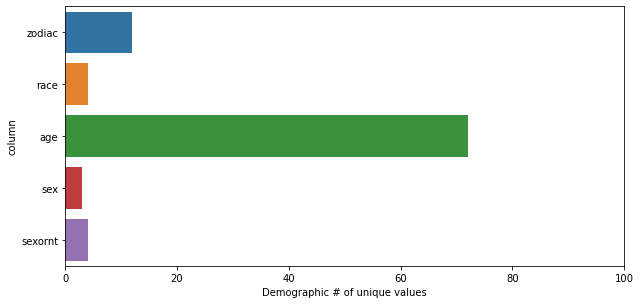

In [8]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view = train_demo.nunique()
s = sns.barplot(x = train_view.values, y = train_view.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Demographic # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [9]:
#group by relationships/family
train_rel = train[['marital','res16','reg16','class']]

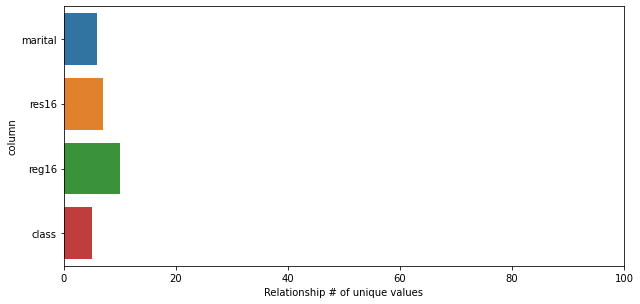

In [10]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view2 = train_rel.nunique()
s = sns.barplot(x = train_view2.values, y = train_view2.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Relationship # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

Interesting to note that for mother and father occupations, there are the most unique counts

In [11]:
#group by work and career
train_work = train[['income','wrkslf','satjob','occ10','degree']]

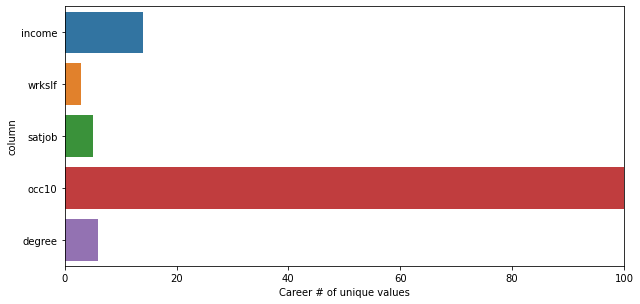

In [12]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view3 = train_work.nunique()
s = sns.barplot(x = train_view3.values, y = train_view3.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Career # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [13]:
#group by religion and spiritual
train_sprt = train[['relig','postlifev','postlifenv','sprtprsn','sprtconnct',
                    'sprtlrgr','sprtpurp'
                   ]]

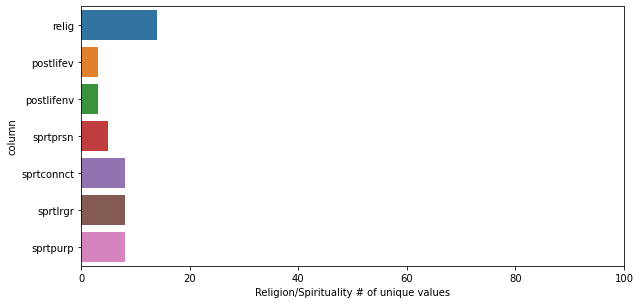

In [14]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view4 = train_sprt.nunique()
s = sns.barplot(x = train_view4.values, y = train_view4.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Religion/Spirituality # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [15]:
#group by opinions
train_opin = train[['fairv','fairnv','helpfulv','helpfulnv','trustv','trustnv',
                    'conmedic','contv','conpress','consci','conjudge','conlegis','happy',
                    'life','obey','popular','thnkself','workhard','helpoth','grtwrks','freemind'
                   ]]

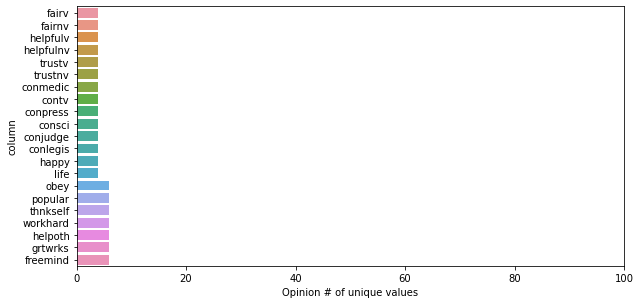

In [16]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view5 = train_opin.nunique()
s = sns.barplot(x = train_view5.values, y = train_view5.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Opinion # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [17]:
#reminder of column names for reference:
train.columns

Index(['zodiac', 'race', 'age', 'sex', 'sexornt', 'marital', 'res16', 'reg16',
       'degree', 'income', 'wrkslf', 'satjob', 'occ10', 'partyid', 'if16who',
       'polviews', 'gunlaw', 'grassv', 'relig', 'postlifev', 'postlifenv',
       'sprtprsn', 'sprtconnct', 'sprtlrgr', 'sprtpurp', 'happy', 'life',
       'obey', 'popular', 'thnkself', 'workhard', 'helpoth', 'grtwrks',
       'freemind', 'decevidc', 'advfmsci', 'mditate1', 'health', 'hlthphys',
       'hlthmntl', 'enjoynat', 'eatmeat', 'recycle', 'nobuygrn', 'fairv',
       'fairnv', 'helpfulv', 'helpfulnv', 'trustv', 'trustnv', 'conmedic',
       'contv', 'conpress', 'consci', 'conjudge', 'conlegis', 'socbar',
       'socrel', 'socommun', 'socfrend', 'satsoc', 'class', 'satfin',
       'quallife', 'partners', 'partnrs5'],
      dtype='object')

Zodiac Count:

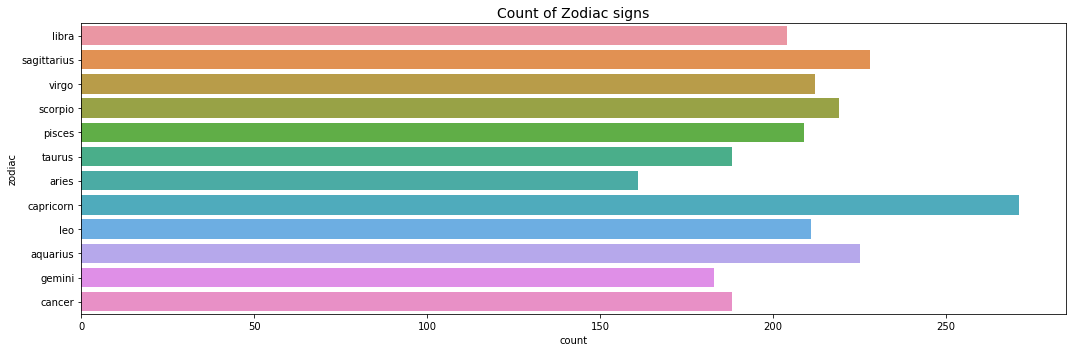

In [18]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'zodiac')
plt.title(f"Count of Zodiac signs", fontsize = 14)
plt.tight_layout()
plt.show()

Relationship Status:

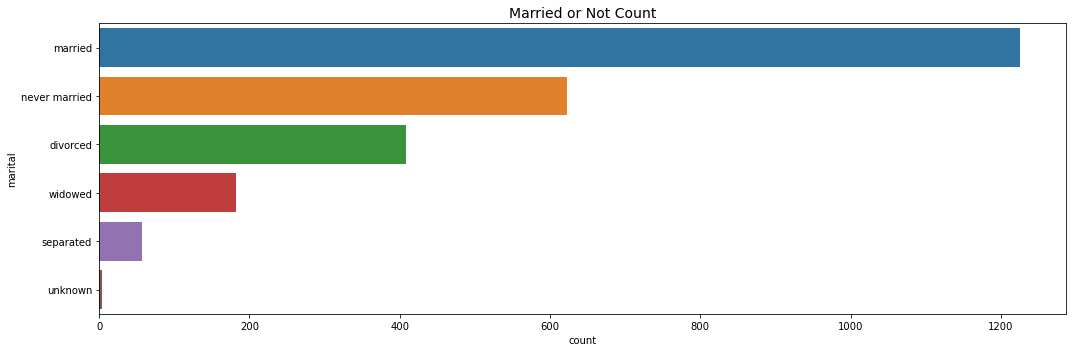

In [19]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'marital')
plt.title(f"Married or Not Count", fontsize = 14)
plt.tight_layout()
plt.show()

Gender:

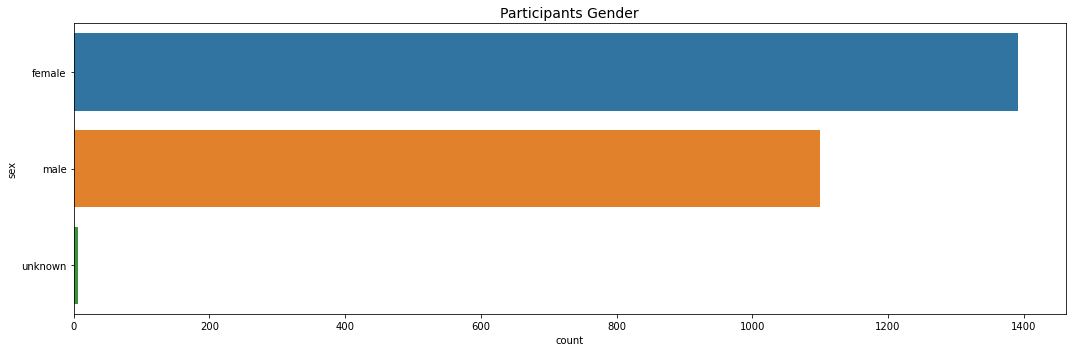

In [20]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'sex')
plt.title(f"Participants Gender", fontsize = 14)
plt.tight_layout()
plt.show()

Sexual Orientation:

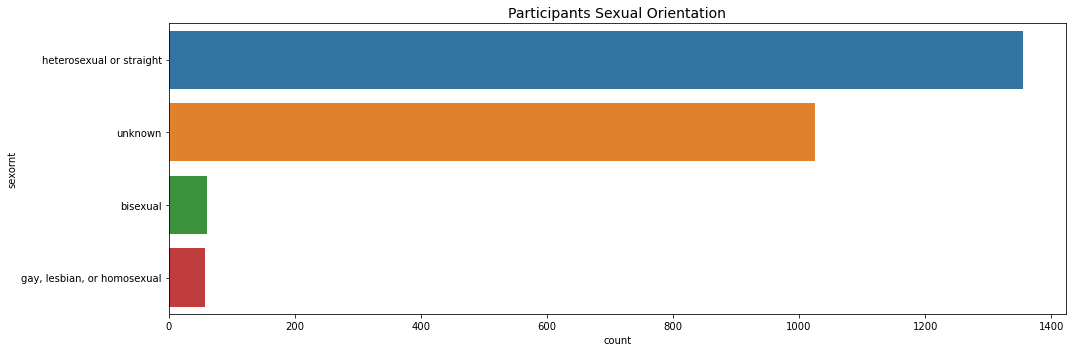

In [21]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'sexornt')
plt.title(f"Participants Sexual Orientation", fontsize = 14)
plt.tight_layout()
plt.show()

Age of Participants: NOTE-will be making bins for this one!

In [22]:
# Number of unique values in the training set columns by count
train.age.describe()

count               2,499.00
mean                   52.13
std                    17.20
min                    18.00
25%                    38.00
50%                    52.00
75%                    66.00
max                    89.00
Name: age, dtype: float64

In [23]:
train.age.value_counts().index

Float64Index([67.0, 52.0, 42.0, 57.0, 33.0, 59.0, 69.0, 60.0, 63.0, 61.0, 68.0,
              55.0, 56.0, 62.0, 40.0, 64.0, 37.0, 46.0, 74.0, 34.0, 41.0, 51.0,
              65.0, 39.0, 70.0, 29.0, 28.0, 31.0, 32.0, 75.0, 44.0, 50.0, 36.0,
              58.0, 30.0, 45.0, 47.0, 49.0, 43.0, 35.0, 71.0, 38.0, 53.0, 72.0,
              66.0, 73.0, 54.0, 25.0, 48.0, 26.0, 79.0, 24.0, 27.0, 22.0, 23.0,
              77.0, 78.0, 89.0, 76.0, 81.0, 80.0, 20.0, 85.0, 83.0, 82.0, 21.0,
              84.0, 19.0, 86.0, 87.0, 88.0, 18.0],
             dtype='float64')

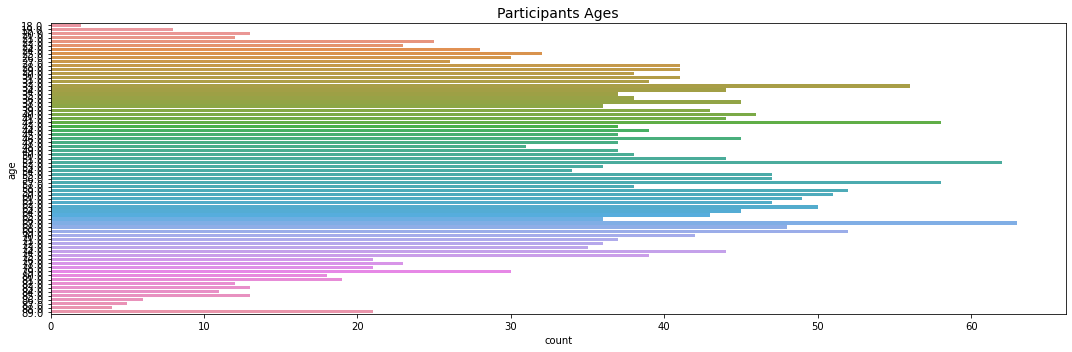

In [24]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'age')
plt.title(f"Participants Ages", fontsize = 14)
plt.tight_layout()
plt.show()

Religion of Participants:

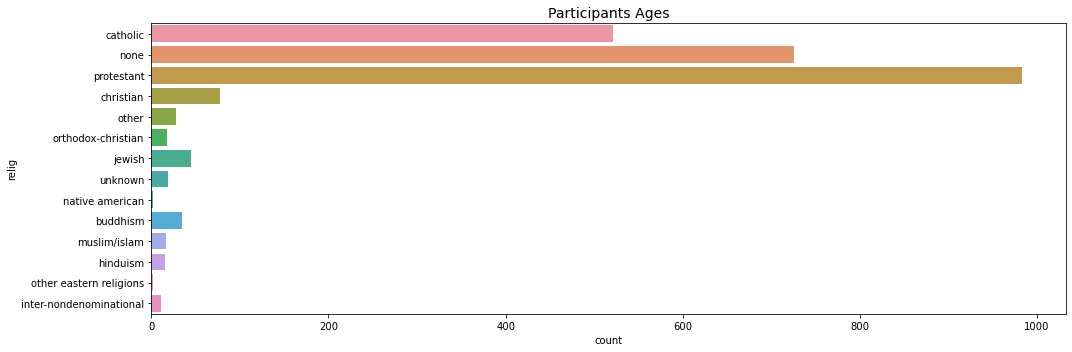

In [25]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'relig')
plt.title(f"Participants Ages", fontsize = 14)
plt.tight_layout()
plt.show()

Creating a loop function to iterate this for each variable:

In [26]:
def variable_count(df):
    columns = df.columns
    for col in columns:
        plt.figure(figsize = (15,  5))
        sns.countplot(data = df, y = col)
        plt.tight_layout()
        plt.show()

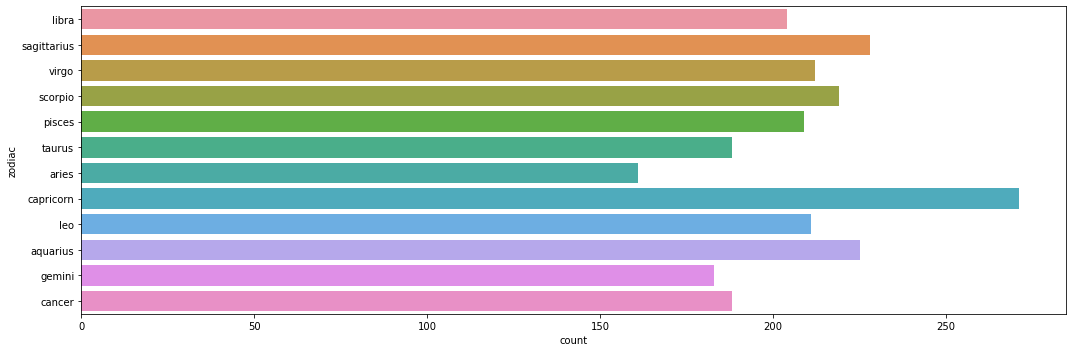

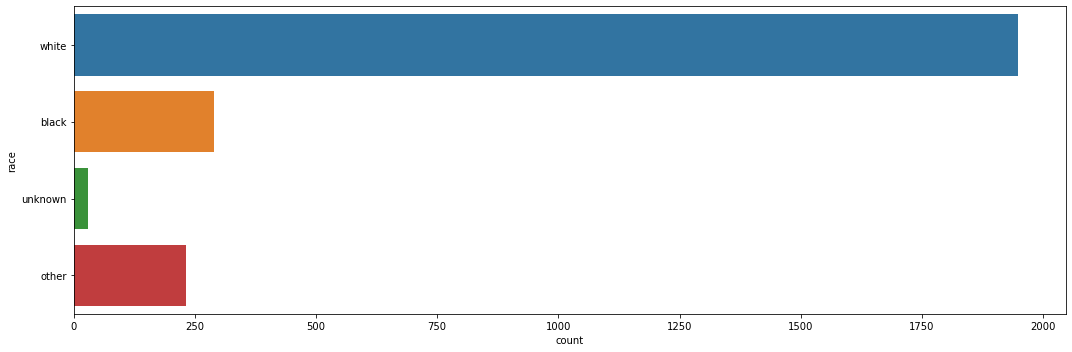

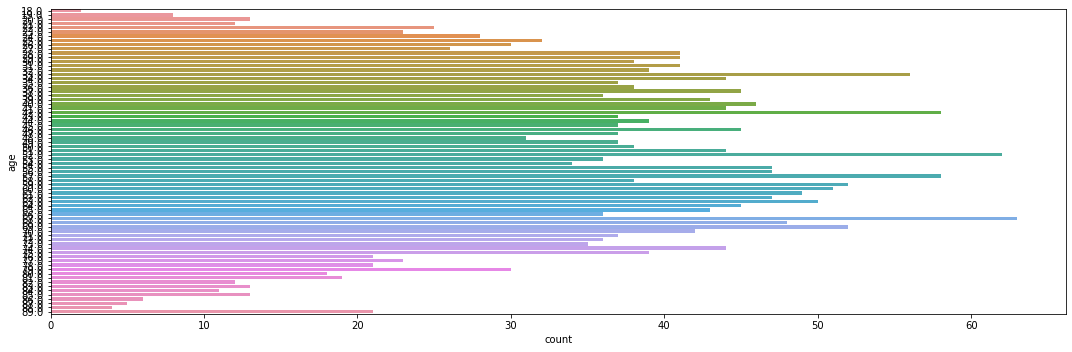

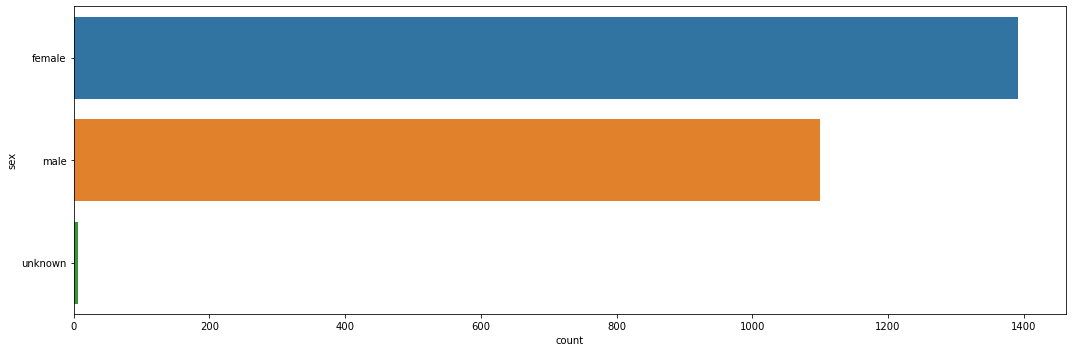

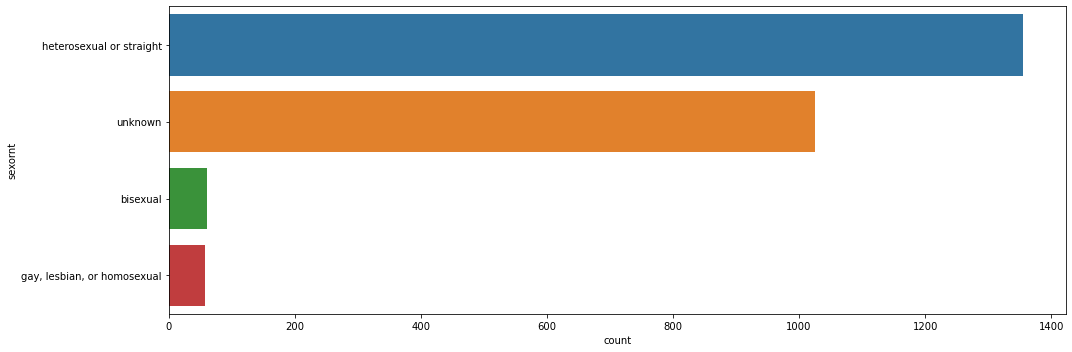

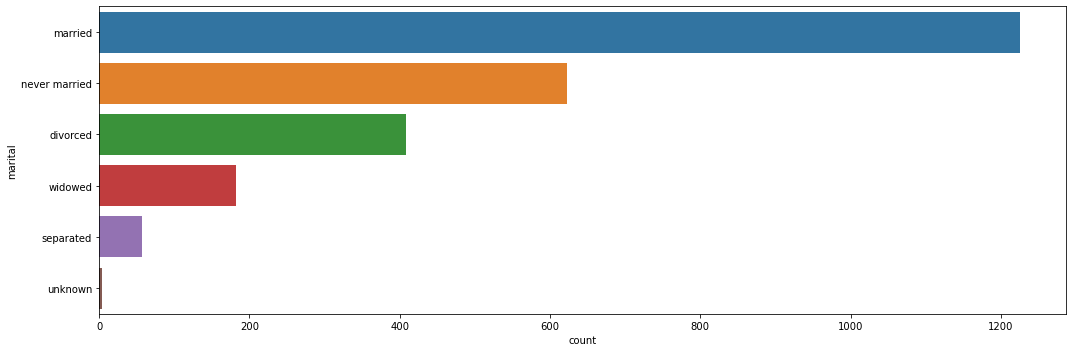

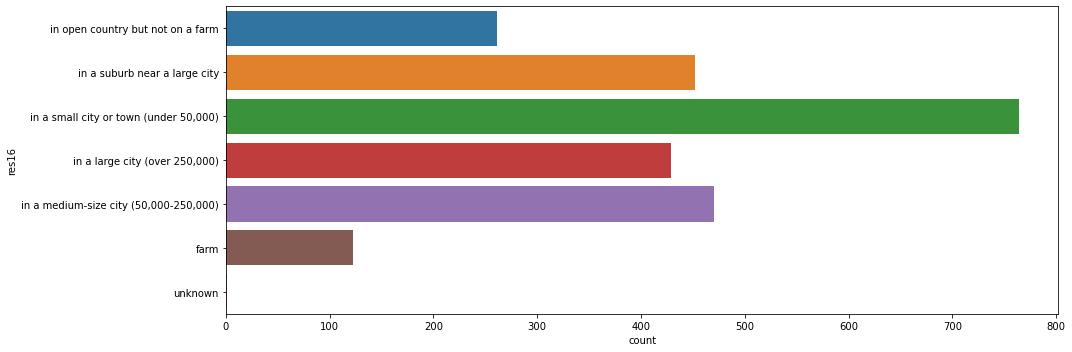

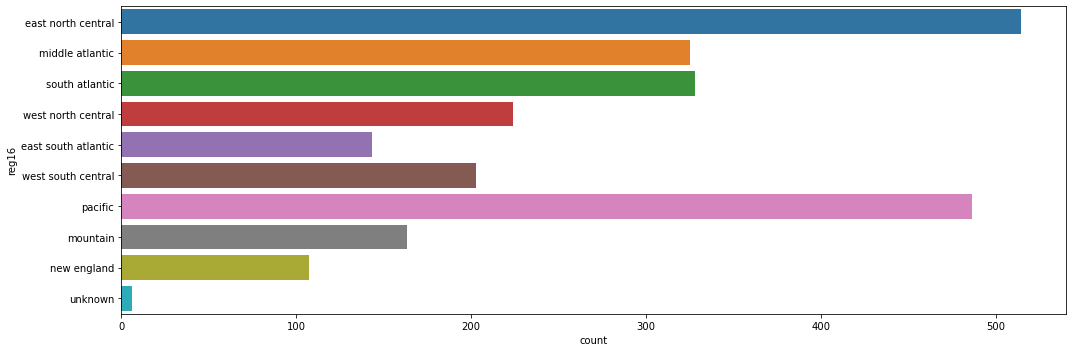

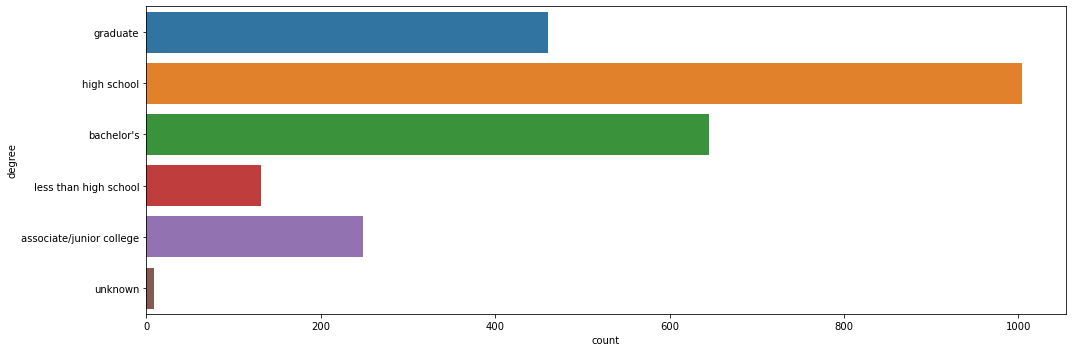

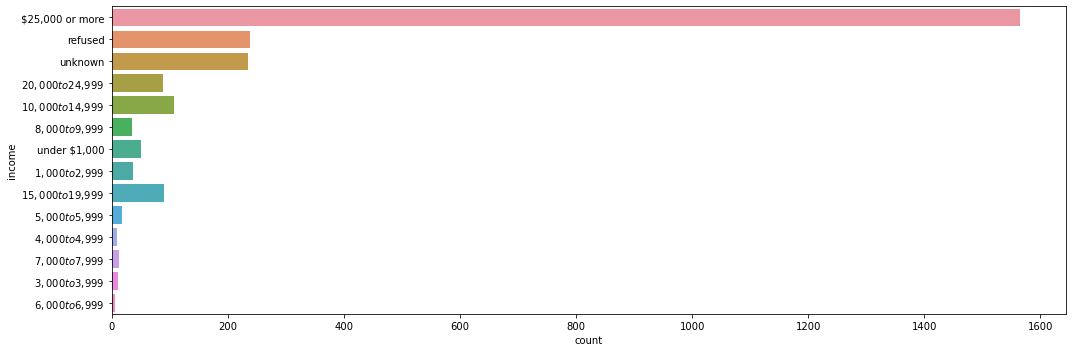

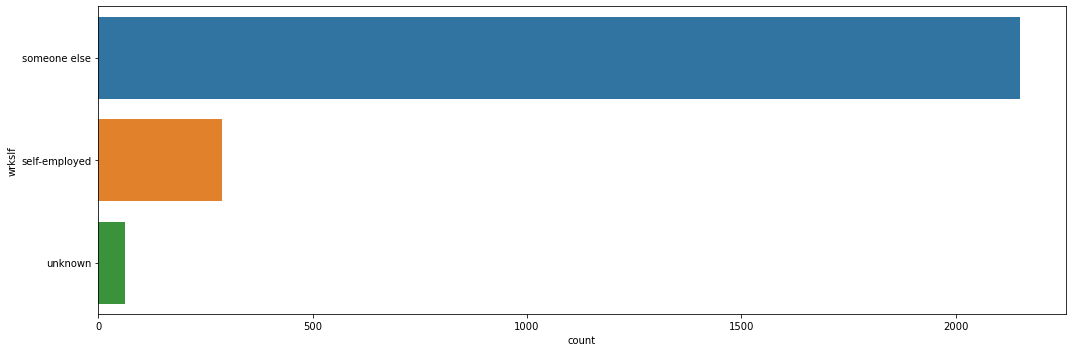

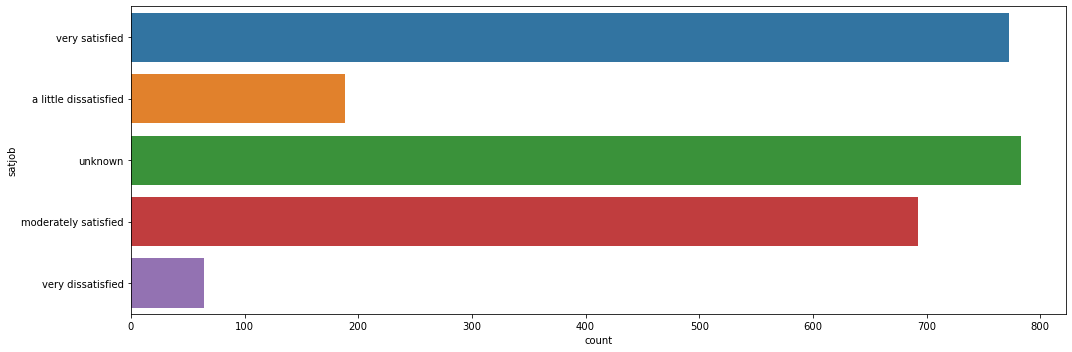

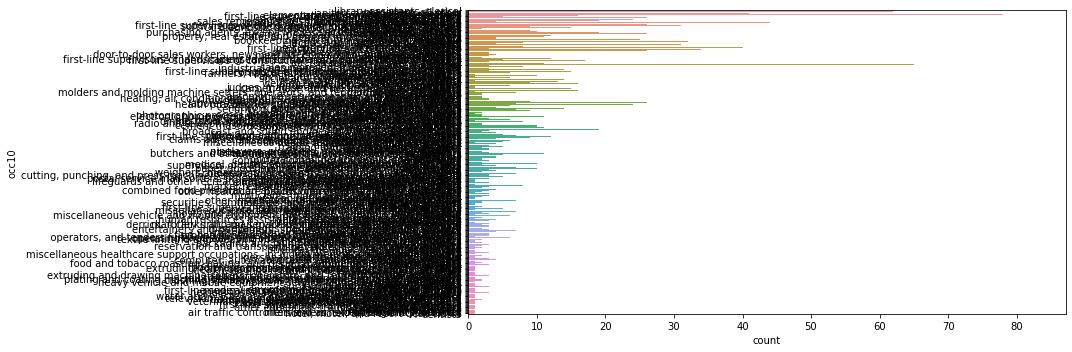

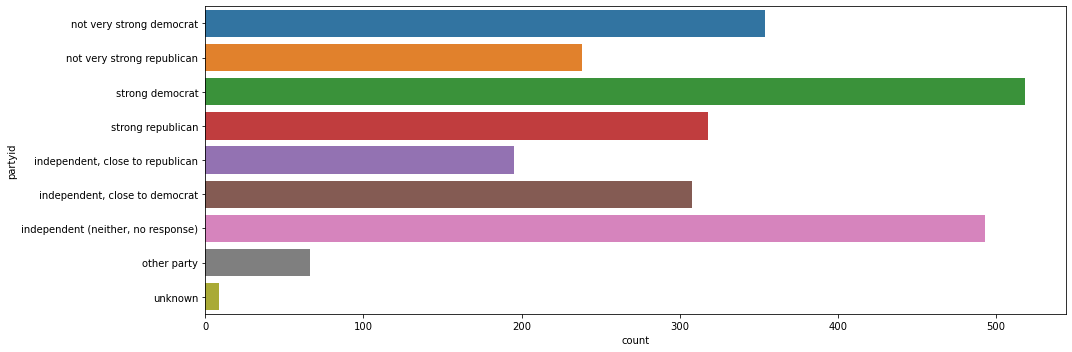

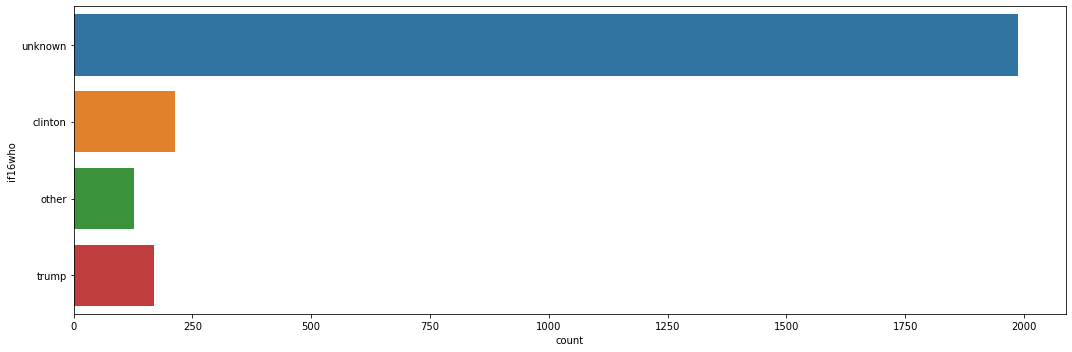

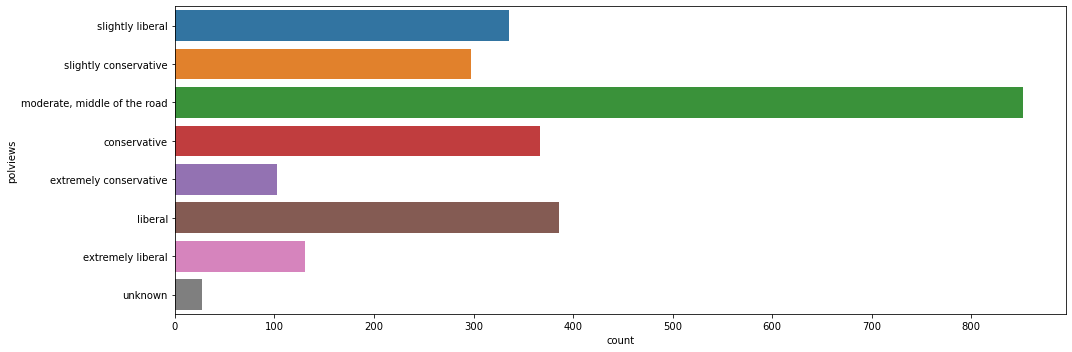

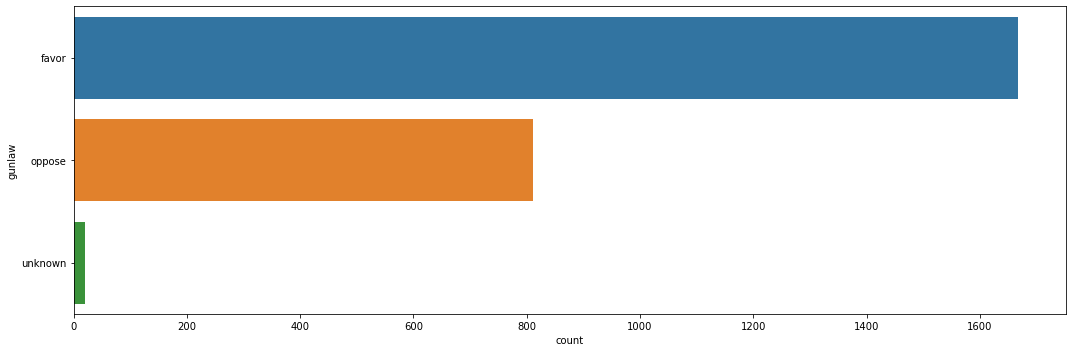

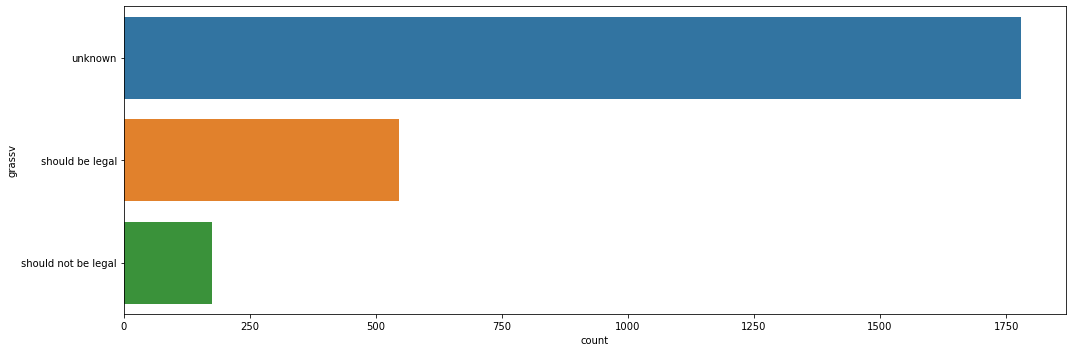

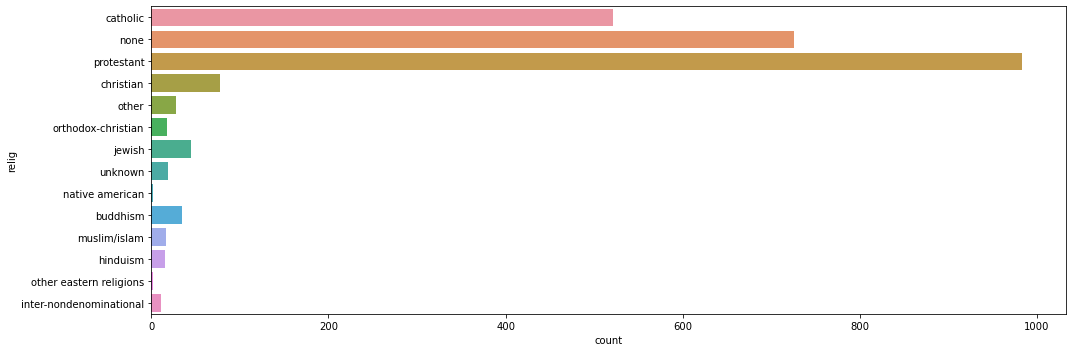

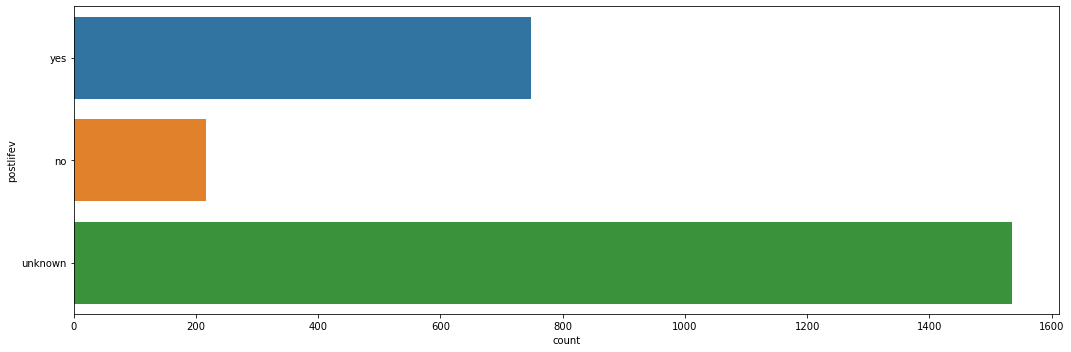

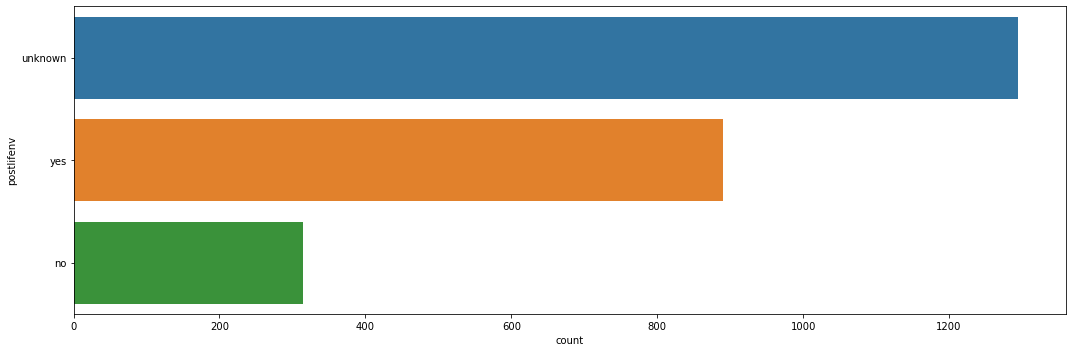

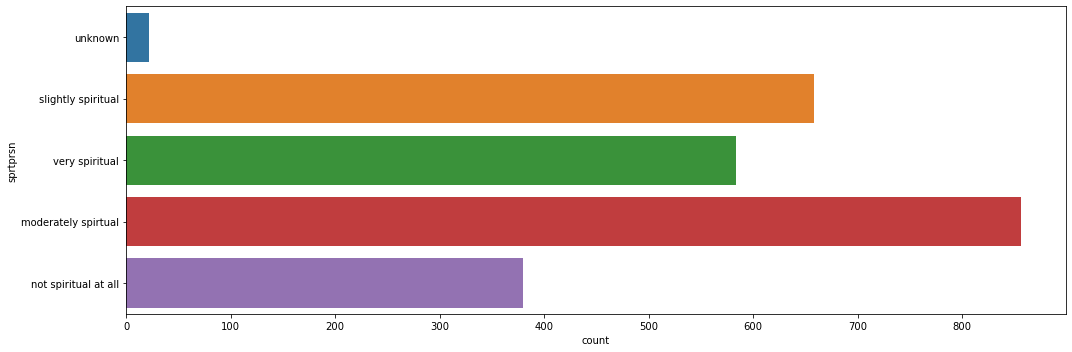

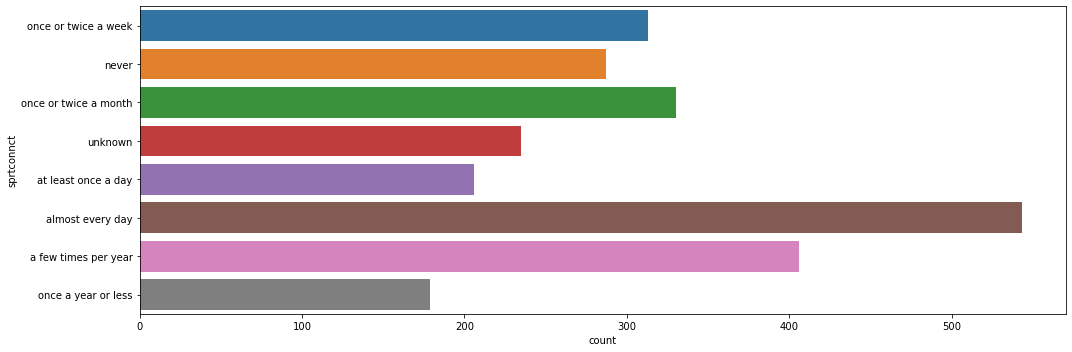

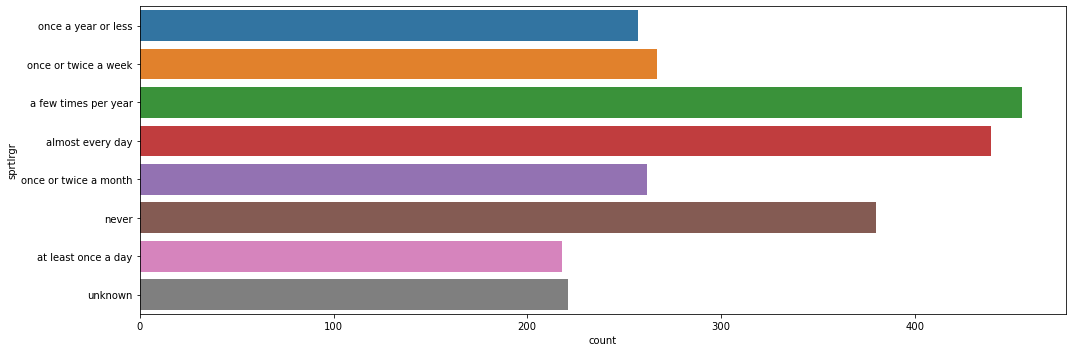

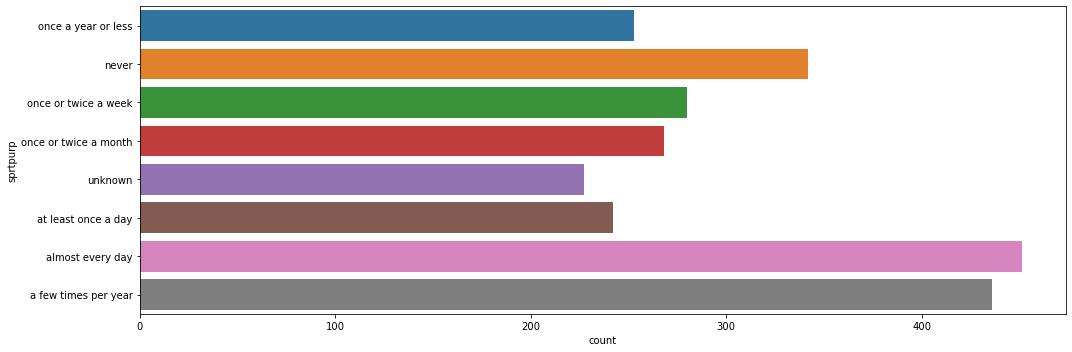

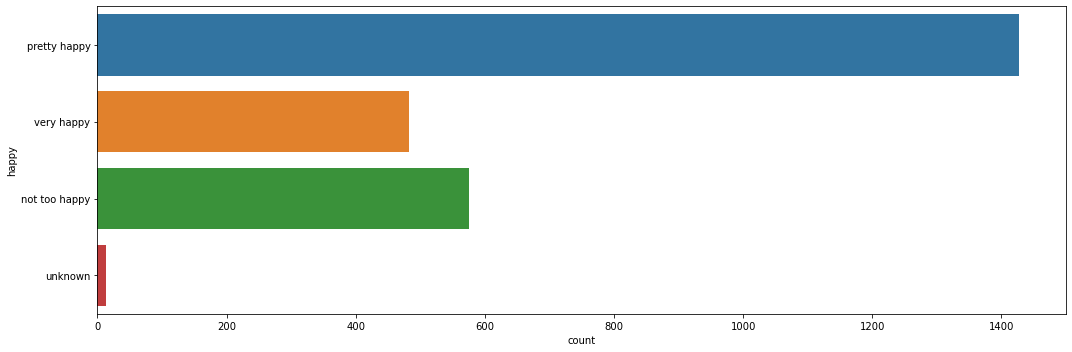

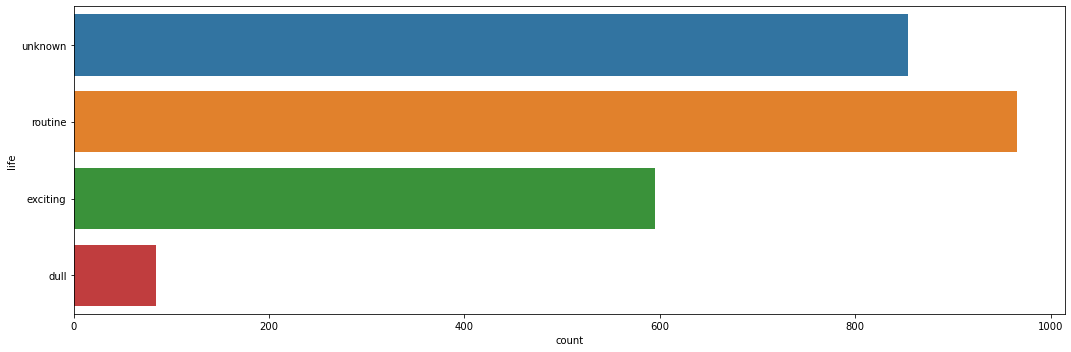

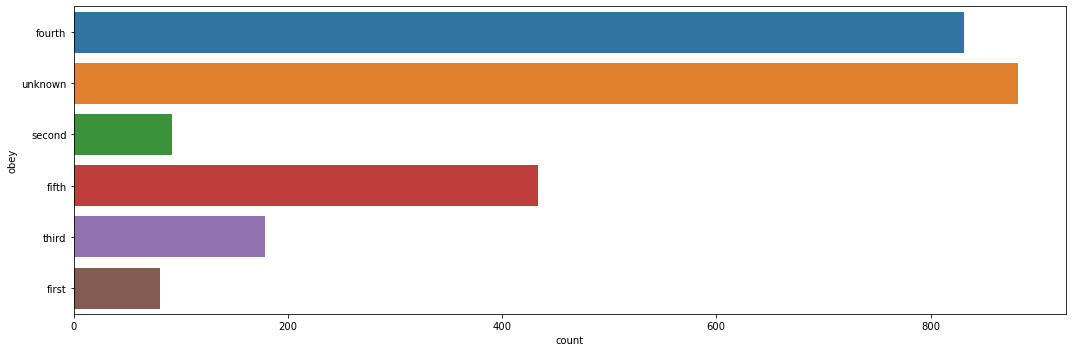

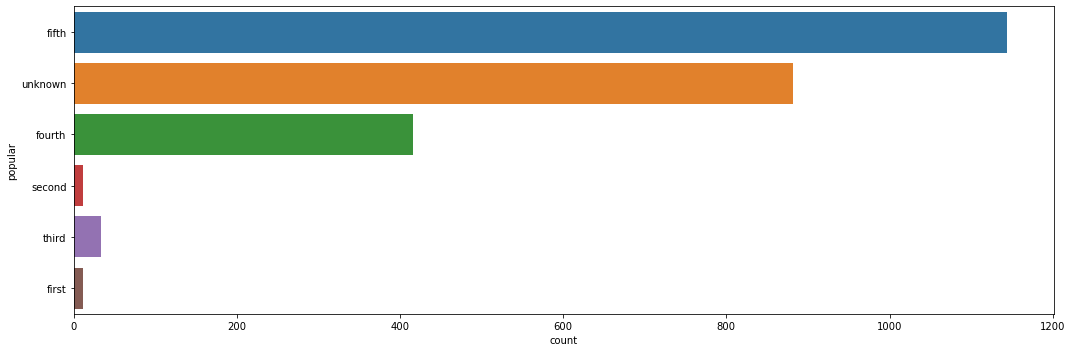

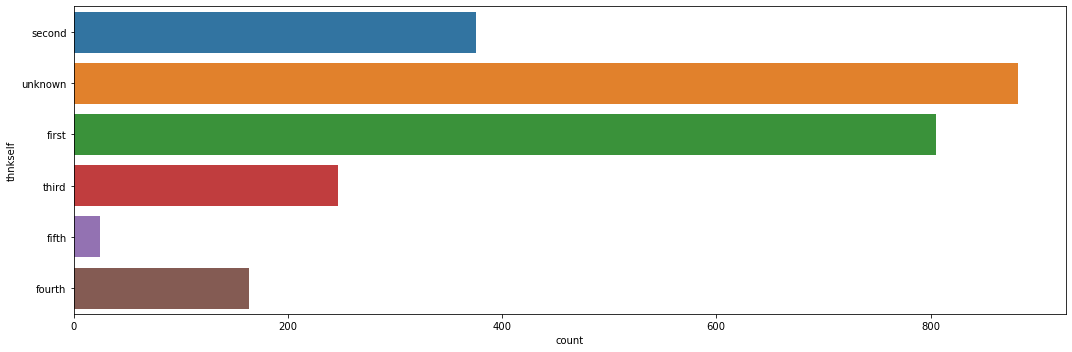

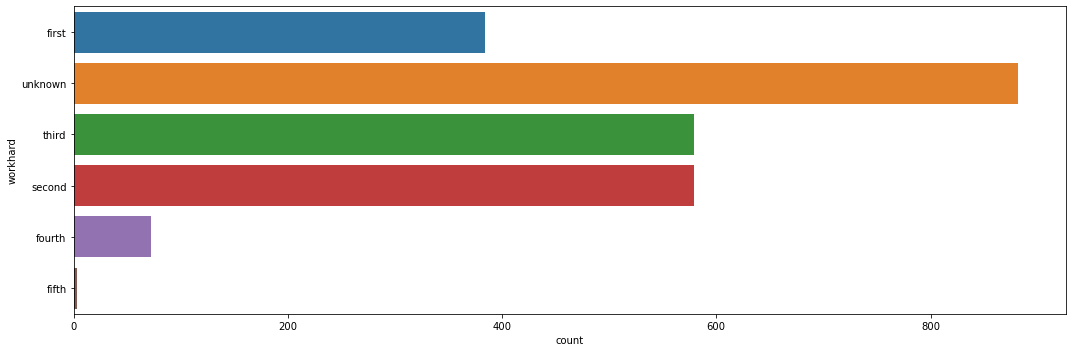

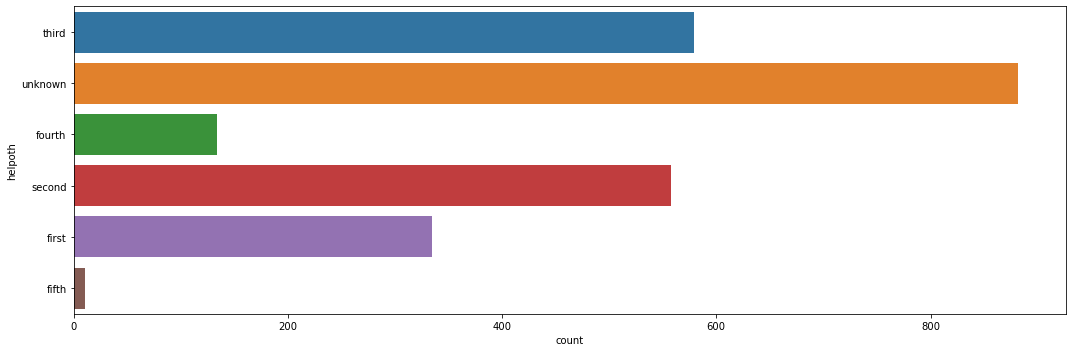

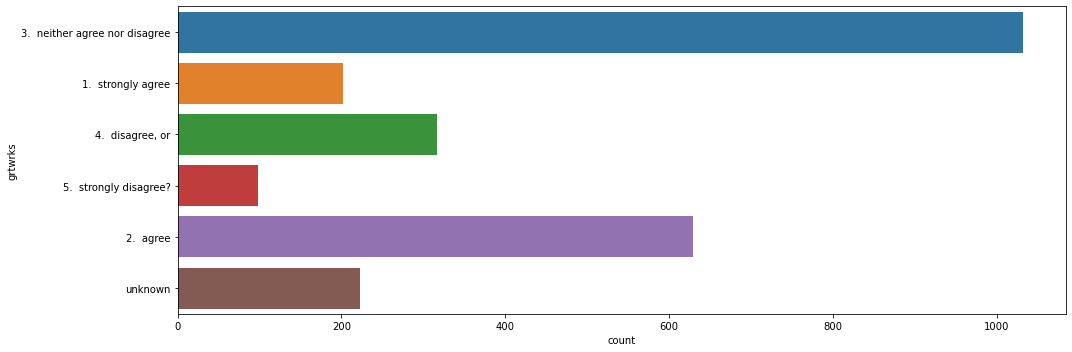

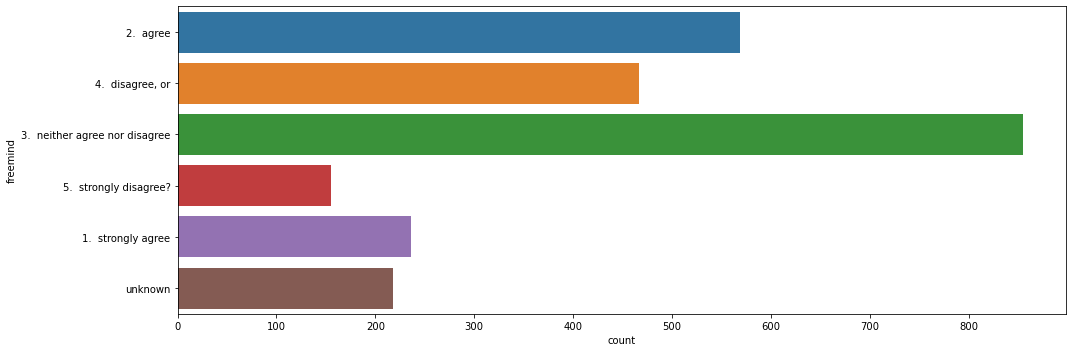

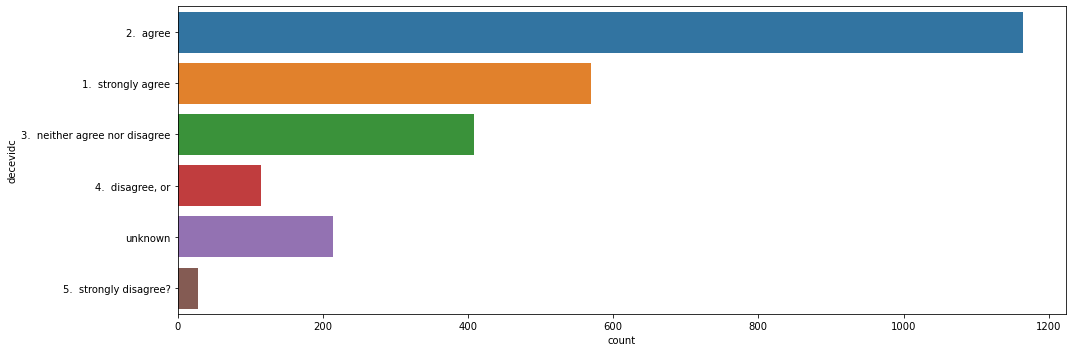

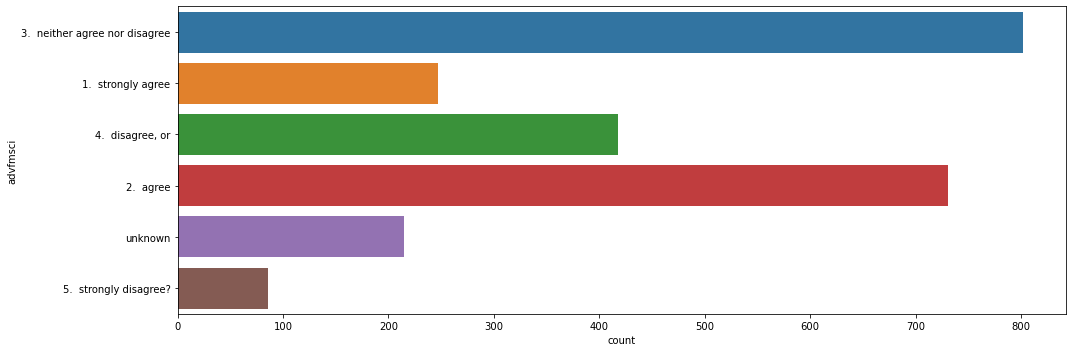

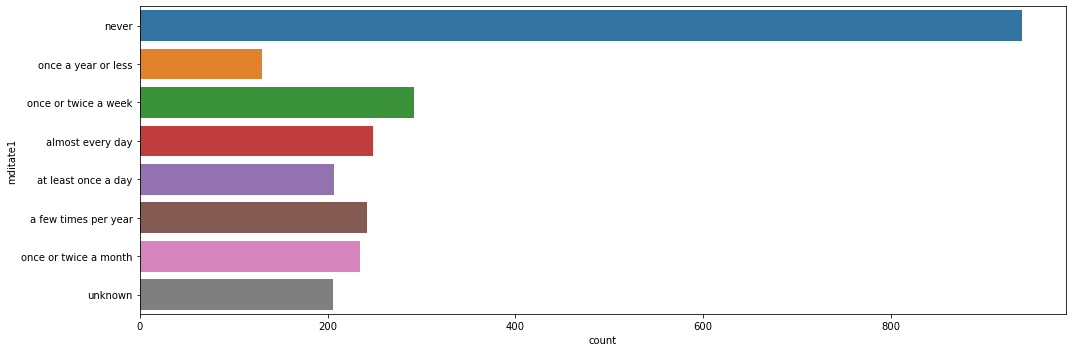

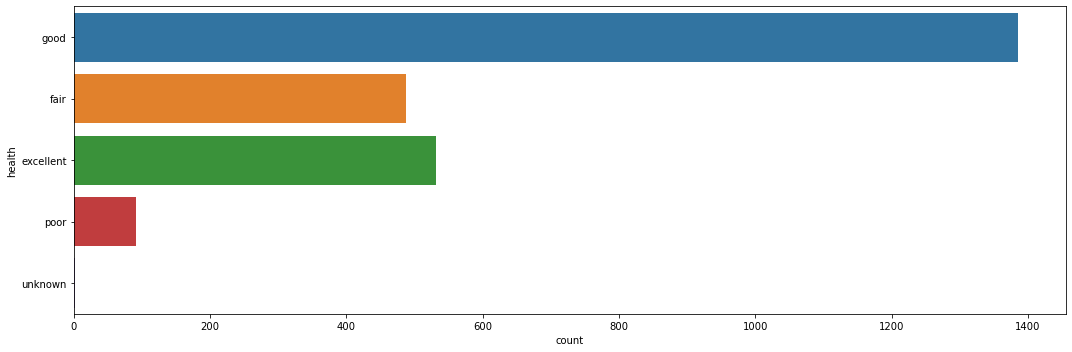

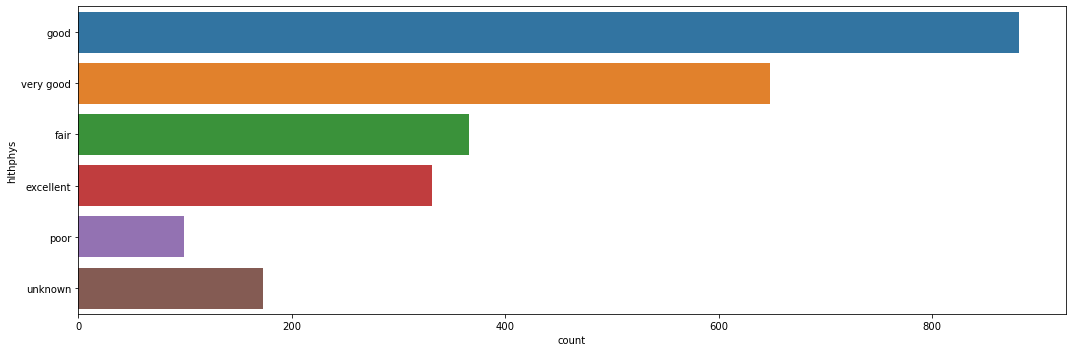

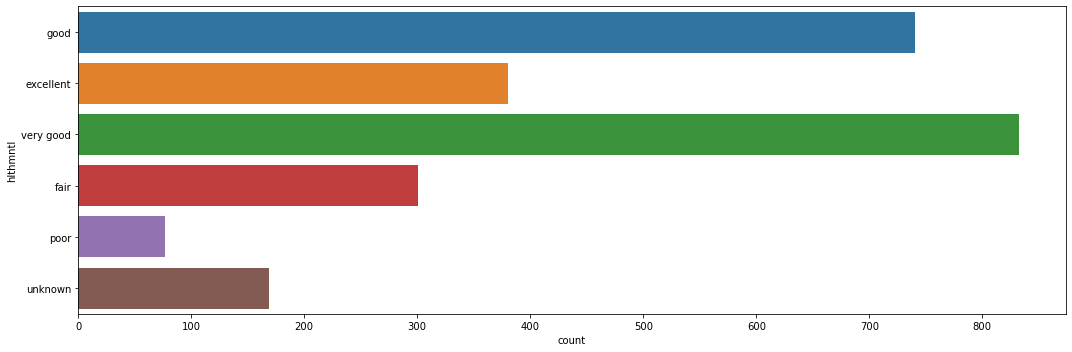

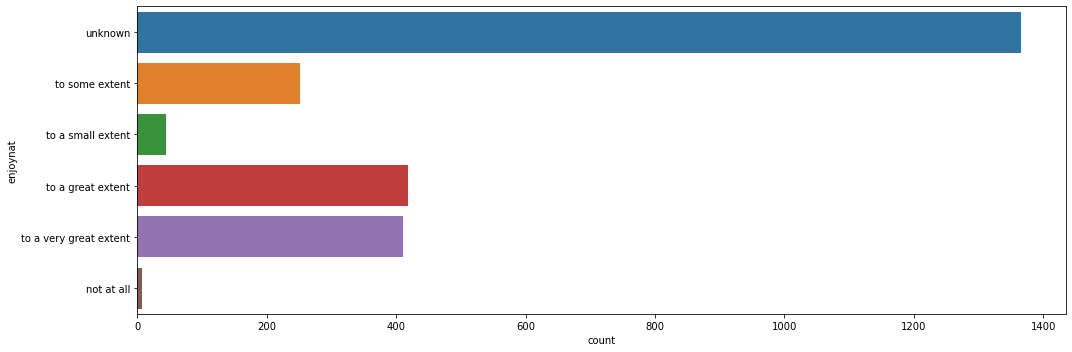

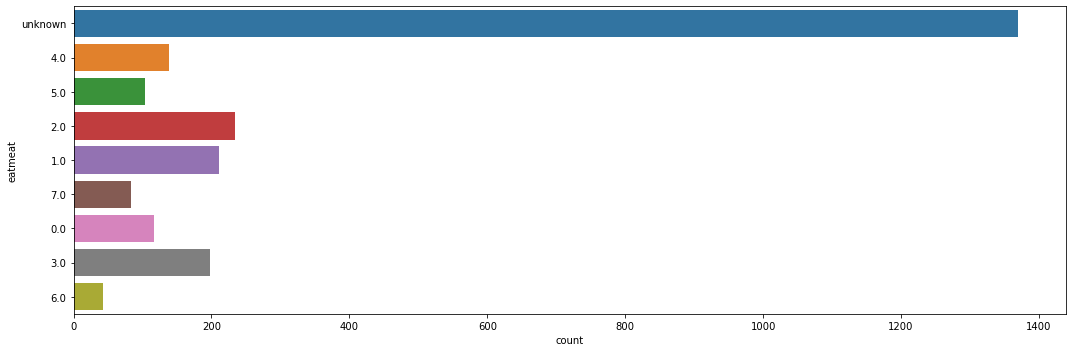

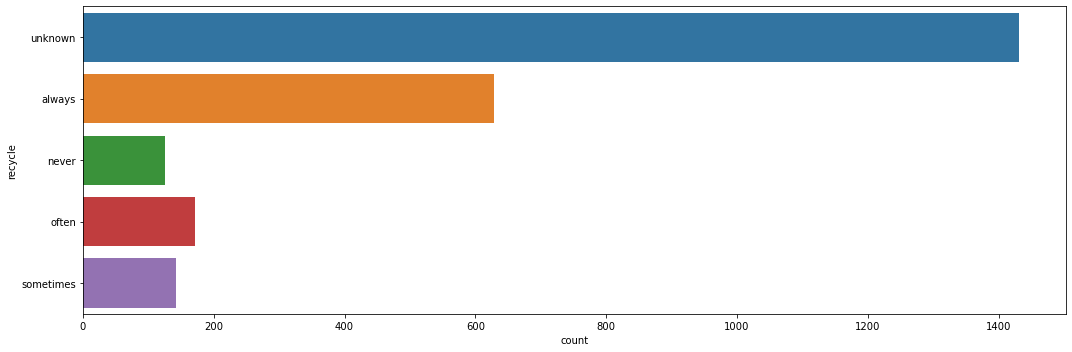

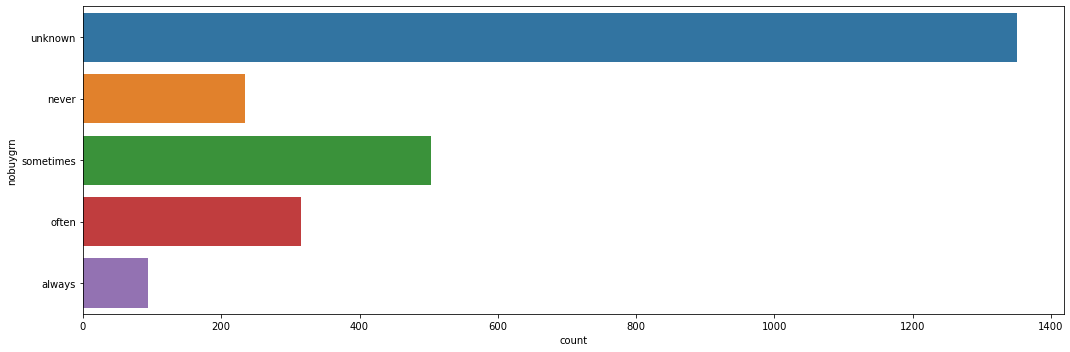

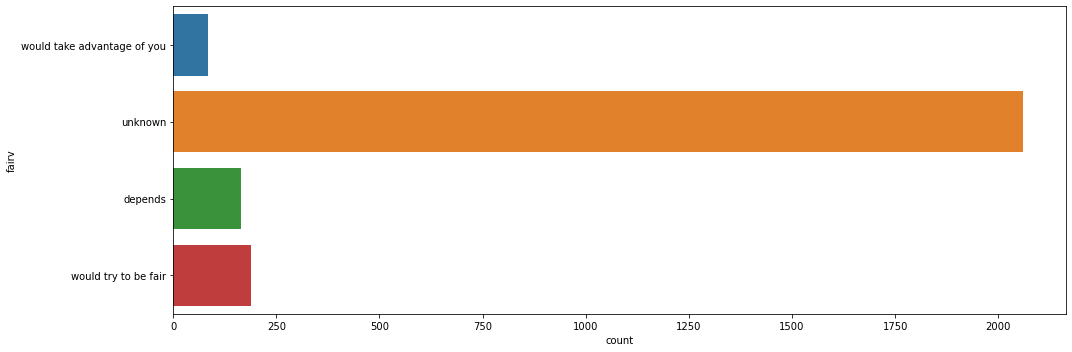

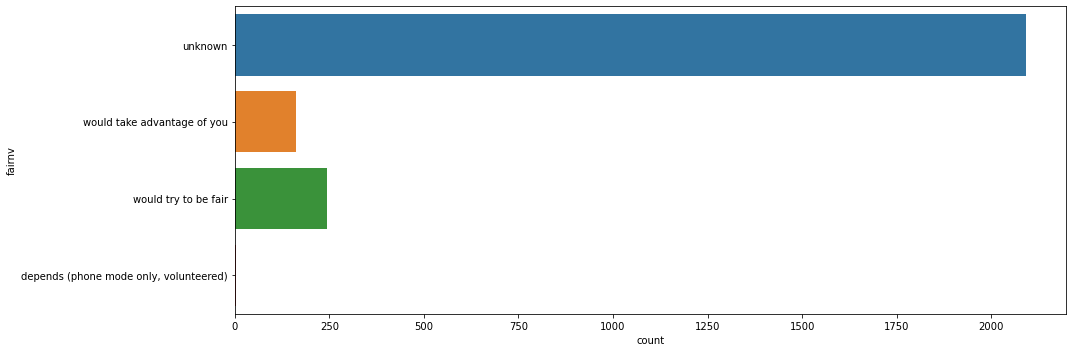

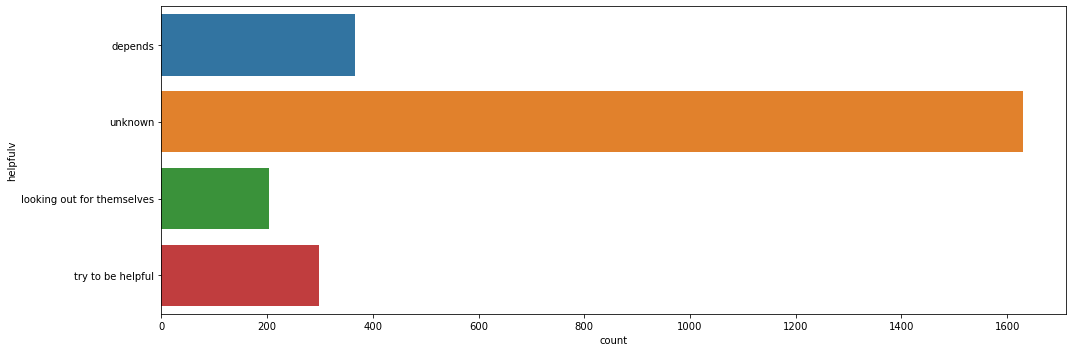

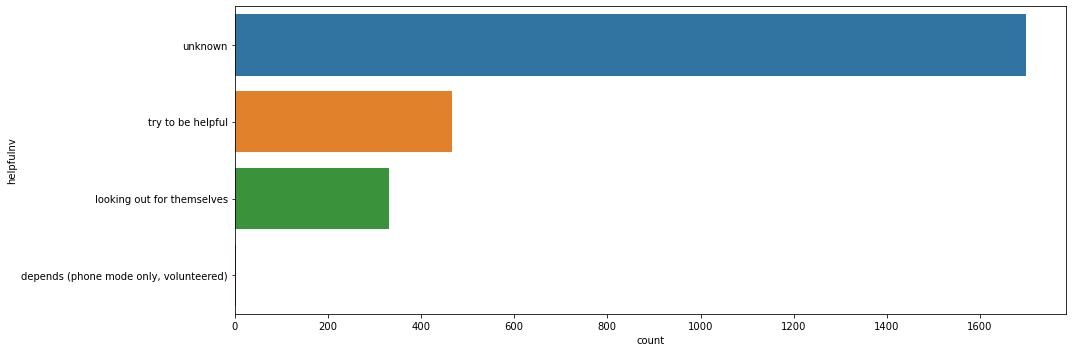

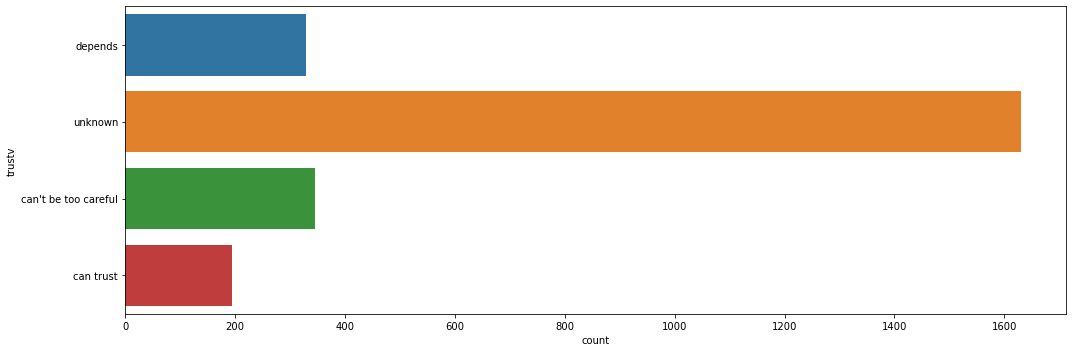

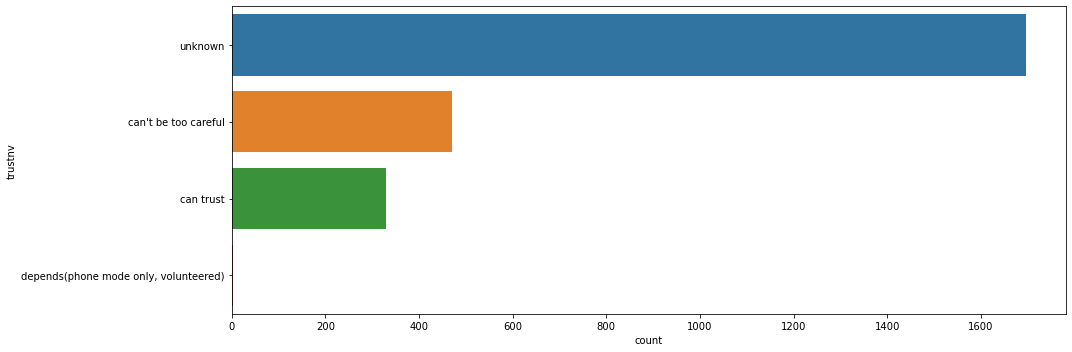

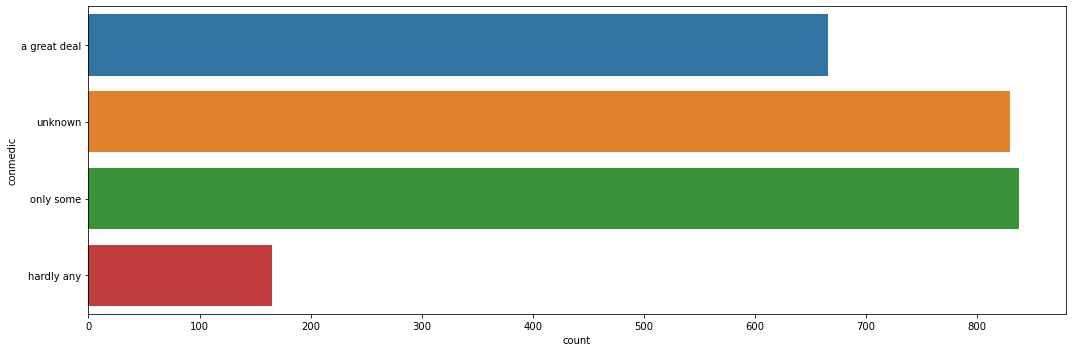

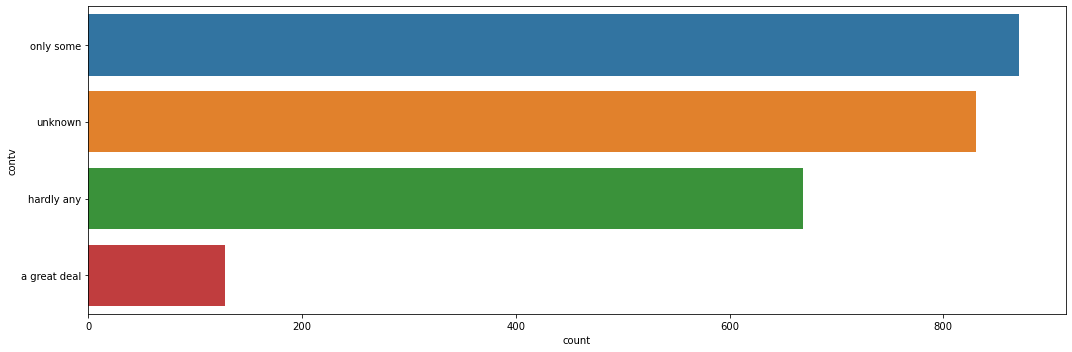

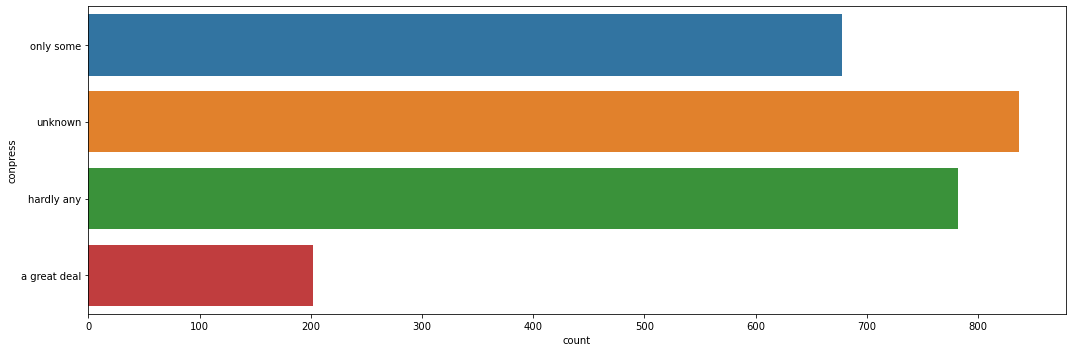

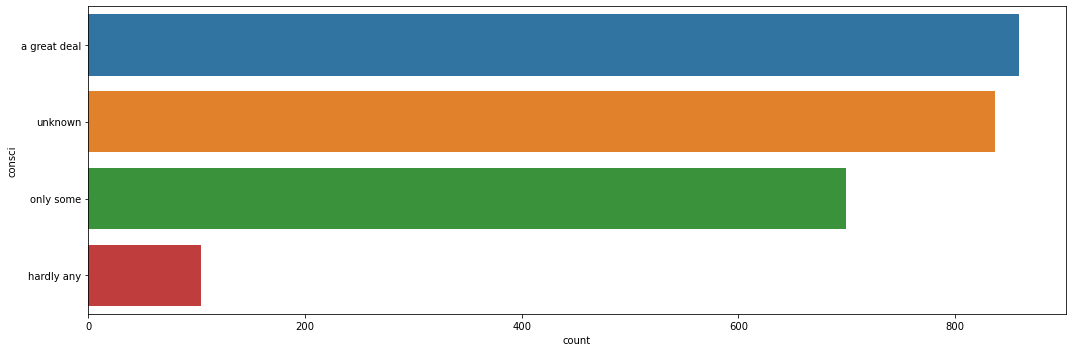

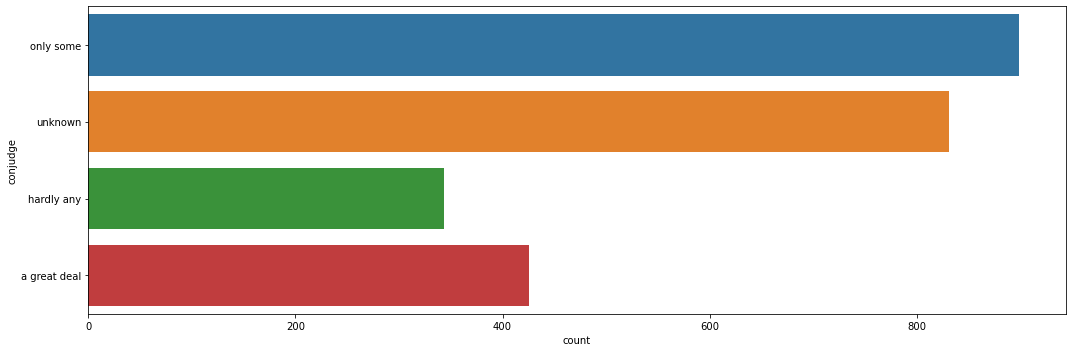

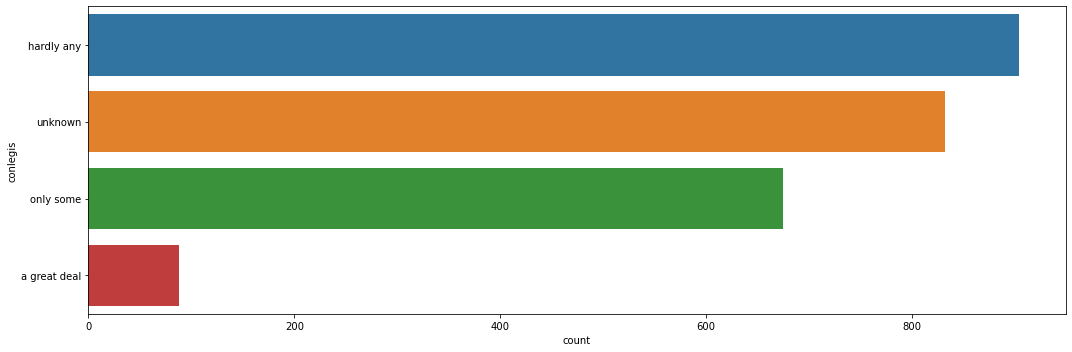

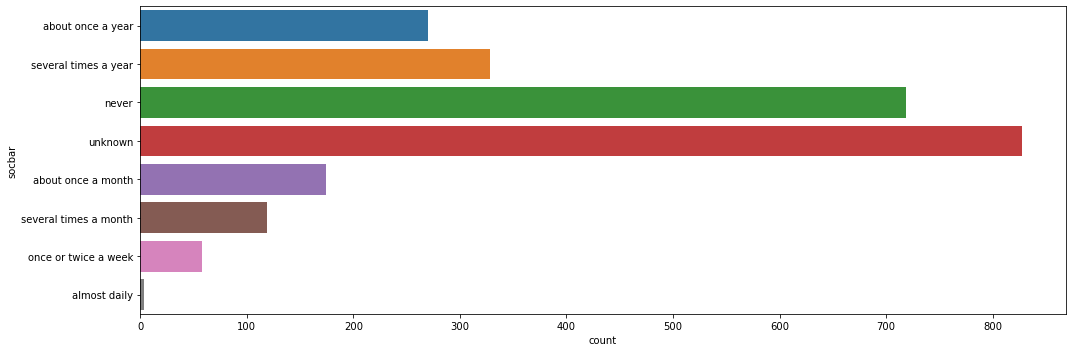

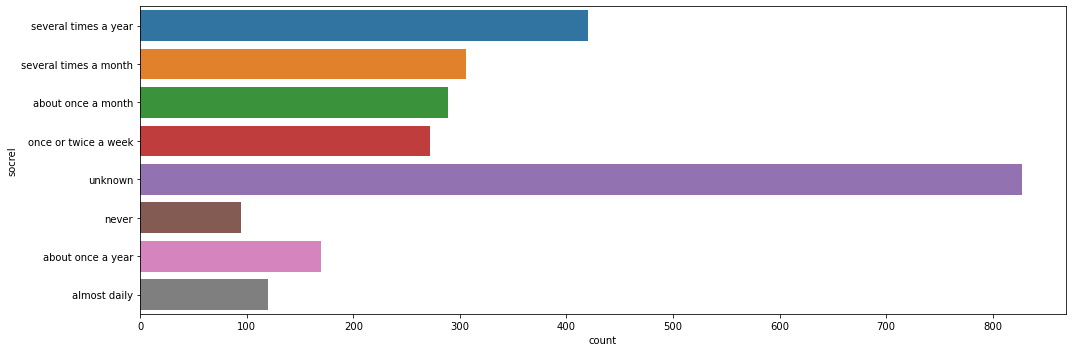

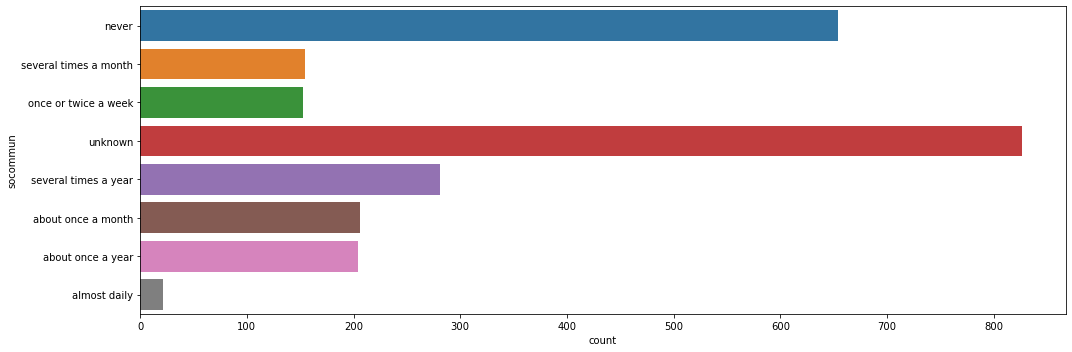

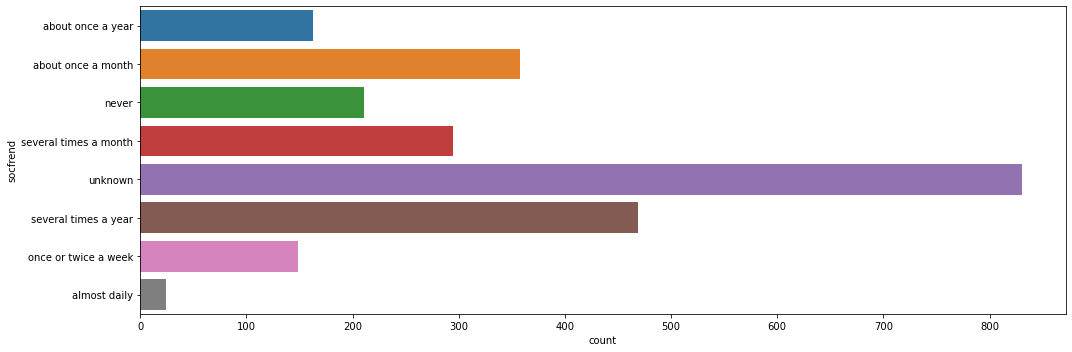

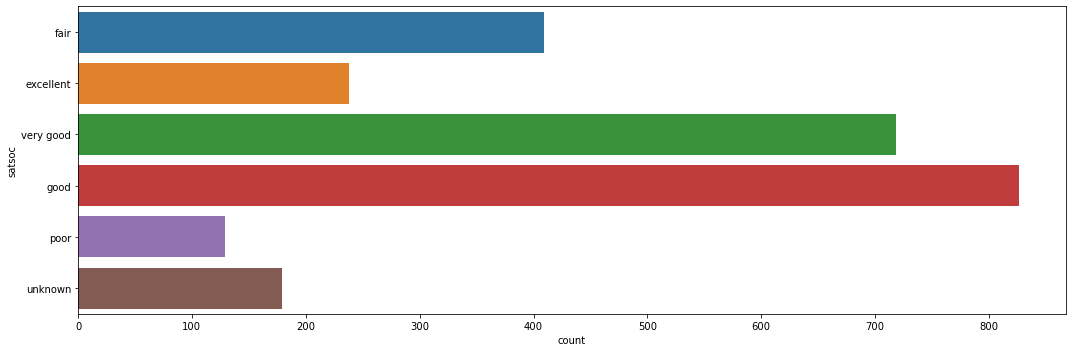

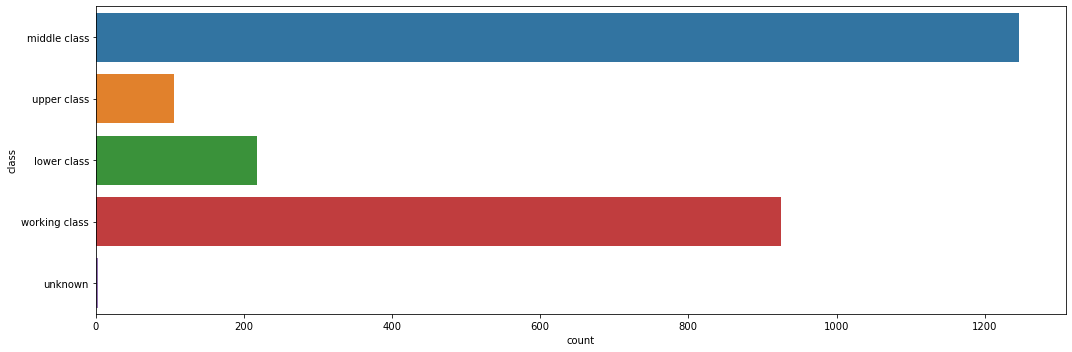

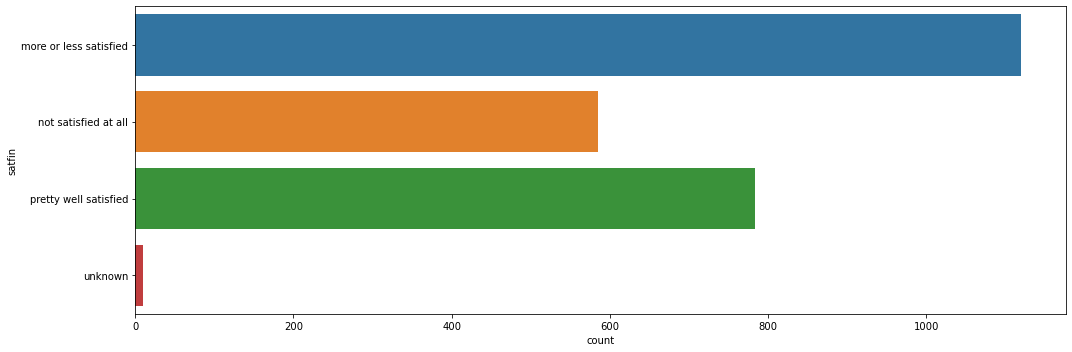

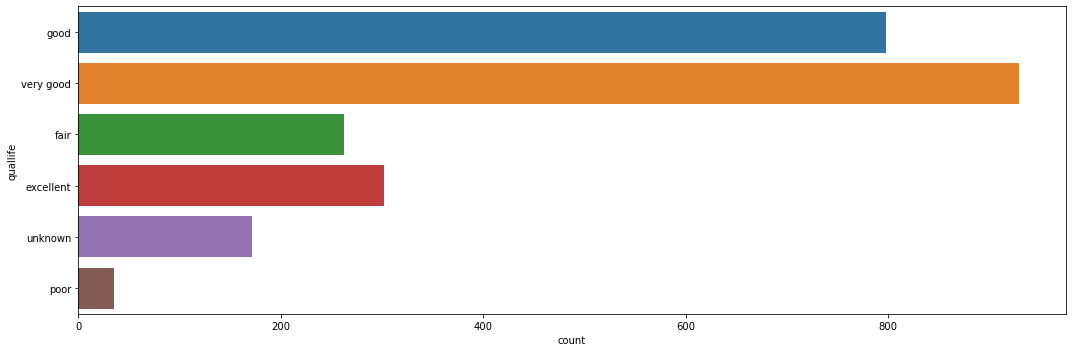

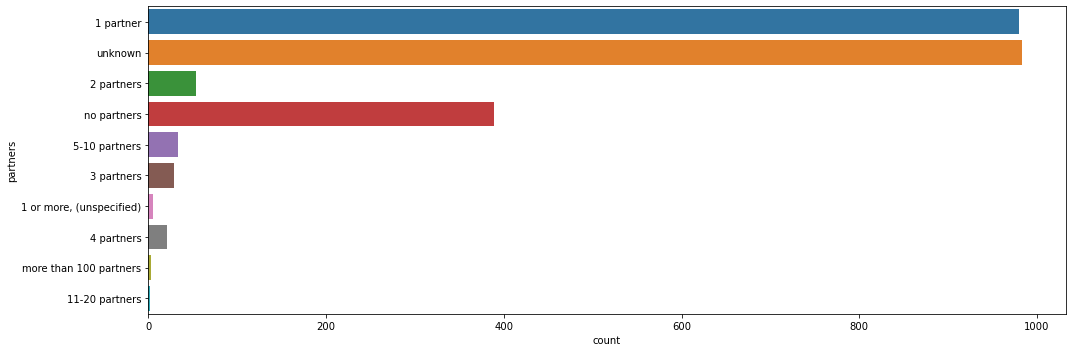

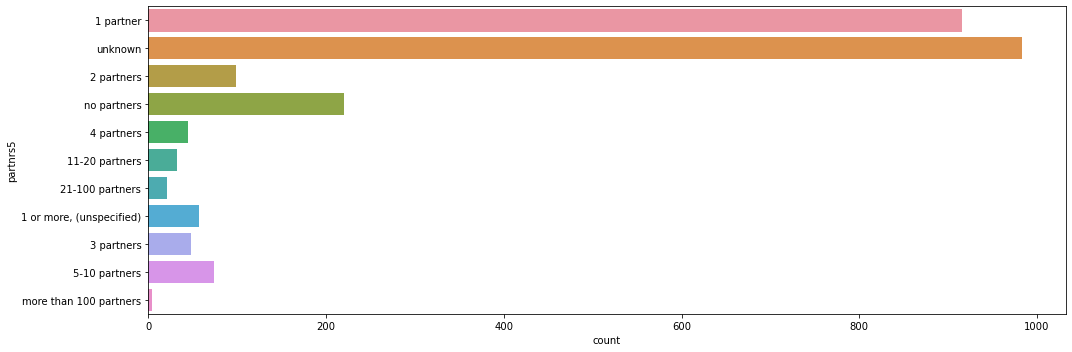

In [27]:
variable_count(train)

### TAKEAWAYS:
- I'll try moving towards MVP but I think that at least figuring out how to bin age groups, and create a numeric column for the zodiac signs.

In [28]:
#binning age into decades (8 equal bins)
ages = train.age
train.age = pd.cut(ages, 8, precision=0)

In [29]:
#looking at the bins created....
train.age.value_counts()

(54.0, 62.0]    423
(62.0, 71.0]    416
(36.0, 45.0]    386
(45.0, 54.0]    367
(27.0, 36.0]    363
(71.0, 80.0]    267
(18.0, 27.0]    173
(80.0, 89.0]    104
Name: age, dtype: int64

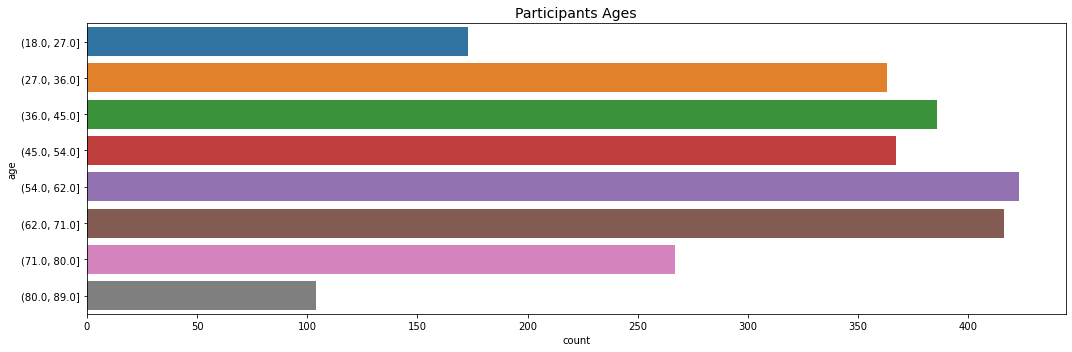

In [30]:
#plotting the new count of age bins
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'age')
plt.title(f"Participants Ages", fontsize = 14)
plt.tight_layout()
plt.show()

^ The above function of binning ages has been added to the wrangle.py file

______________________________________________________________________________

## Adding columns and encoding:

I'd like to add a column that numbers the zodiac in order, so as to have continous data on the target variable.

In [31]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(train['zodiac'])
#create a new column for numeric zodiac
train["zodiac_num"] = label

In [32]:
train.head(1)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,socrel,socommun,socfrend,satsoc,class,satfin,quallife,partners,partnrs5,zodiac_num
238,libra,white,"(36.0, 45.0]",female,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,several times a year,never,about once a year,fair,middle class,more or less satisfied,good,1 partner,1 partner,6


### Encoding Columns for numeric sake:

In [33]:
# using get_dummies to encode sex, race, degree and class columns-then concatinating them to the train df
dummy_df = pd.get_dummies(train[['sex','race','degree','class']], dummy_na=False, drop_first= False, dtype=int)
train = pd.concat([train, dummy_df], axis=1)

In [34]:
train.head(1)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,degree_bachelor's,degree_graduate,degree_high school,degree_less than high school,degree_unknown,class_lower class,class_middle class,class_unknown,class_upper class,class_working class
238,libra,white,"(36.0, 45.0]",female,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,0,1,0,0,0,0,1,0,0,0


#### Encoding zodiac column:

In [35]:
# get the dummies and store it in a variable
dummy_df2 = pd.get_dummies(train[['zodiac']], dummy_na=False, drop_first= False, dtype=int)
train = pd.concat([train, dummy_df2], axis=1)

In [36]:
train.columns

Index(['zodiac', 'race', 'age', 'sex', 'sexornt', 'marital', 'res16', 'reg16',
       'degree', 'income', 'wrkslf', 'satjob', 'occ10', 'partyid', 'if16who',
       'polviews', 'gunlaw', 'grassv', 'relig', 'postlifev', 'postlifenv',
       'sprtprsn', 'sprtconnct', 'sprtlrgr', 'sprtpurp', 'happy', 'life',
       'obey', 'popular', 'thnkself', 'workhard', 'helpoth', 'grtwrks',
       'freemind', 'decevidc', 'advfmsci', 'mditate1', 'health', 'hlthphys',
       'hlthmntl', 'enjoynat', 'eatmeat', 'recycle', 'nobuygrn', 'fairv',
       'fairnv', 'helpfulv', 'helpfulnv', 'trustv', 'trustnv', 'conmedic',
       'contv', 'conpress', 'consci', 'conjudge', 'conlegis', 'socbar',
       'socrel', 'socommun', 'socfrend', 'satsoc', 'class', 'satfin',
       'quallife', 'partners', 'partnrs5', 'zodiac_num', 'sex_female',
       'sex_male', 'sex_unknown', 'race_black', 'race_other', 'race_unknown',
       'race_white', 'degree_associate/junior college', 'degree_bachelor's',
       'degree_graduate', 'd

### Adding column to have birthdates that relate to Zodiac Sign

In [37]:
def zodiac_dates(row):  
    if row['zodiac'] == 'libra':
        return 'Sept 22-Oct 23'
    elif row['zodiac'] == 'aries':
        return 'March 21-April 19'
    elif row['zodiac'] == 'taurus':
        return 'April 20-May 20'
    elif row['zodiac'] == 'gemini':
        return 'May 21-June 21'
    elif row['zodiac'] == 'cancer':
        return 'June 22-July 22'
    elif row['zodiac'] == 'leo':
        return 'July 23-Aug 22'
    elif row['zodiac'] == 'virgo':
        return 'Aug 23-Sept 22'
    elif row['zodiac'] == 'scorpio':
        return 'Oct 23-Nov 21'
    elif row['zodiac'] == 'sagittarius':
        return 'Nov 22-Dec 21'
    elif row['zodiac'] == 'capricorn':
        return 'Dec 22-Jan 19'
    elif row['zodiac'] == 'aquarius':
        return 'Jan 20-Feb 18'
    return 'Feb 19-March 20'

In [38]:
#adding this row with the date function:
train['zodiac_dates'] = train.apply(lambda row: zodiac_dates(row), axis=1)
train.head()

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,zodiac_capricorn,zodiac_gemini,zodiac_leo,zodiac_libra,zodiac_pisces,zodiac_sagittarius,zodiac_scorpio,zodiac_taurus,zodiac_virgo,zodiac_dates
238,libra,white,"(36.0, 45.0]",female,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,0,0,0,1,0,0,0,0,0,Sept 22-Oct 23
342,libra,white,"(45.0, 54.0]",male,unknown,married,in a suburb near a large city,middle atlantic,graduate,refused,...,0,0,0,1,0,0,0,0,0,Sept 22-Oct 23
786,sagittarius,black,"(45.0, 54.0]",female,heterosexual or straight,never married,"in a small city or town (under 50,000)",south atlantic,high school,unknown,...,0,0,0,0,0,1,0,0,0,Nov 22-Dec 21
1767,libra,black,"(62.0, 71.0]",female,heterosexual or straight,never married,"in a large city (over 250,000)",east north central,bachelor's,unknown,...,0,0,0,1,0,0,0,0,0,Sept 22-Oct 23
509,virgo,black,"(36.0, 45.0]",female,heterosexual or straight,never married,"in a medium-size city (50,000-250,000)",south atlantic,high school,"$20,000 to $24,999",...,0,0,0,0,0,0,0,0,1,Aug 23-Sept 22


In [92]:
train.shape

(2499, 98)

In [94]:
train.sex.value_counts()

female     1392
male       1100
unknown       7
Name: sex, dtype: int64

## Visualizing Bivariates: Gender and Signs
#### Key Takeaways:
- Female participants: 1,392 |  55.7% of participants
- Male participants: 1,100 | 44% of participants
- Other gender parti: 7 | .02%ish




### Fire Signs
- Aries
- Leo
- Sagittarius

<AxesSubplot:xlabel='sex_male', ylabel='zodiac_leo'>

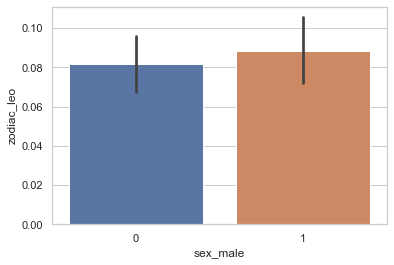

In [113]:
#define dimensions of subplots (rows, columns)
sns.set_theme(style="whitegrid")

sns.barplot(data=train, x= 'sex_male', y = 'zodiac_leo')

<AxesSubplot:ylabel='zodiac'>

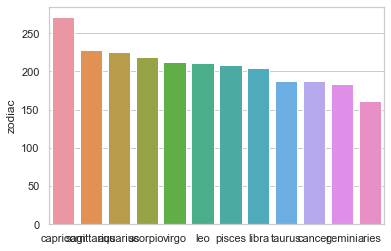

In [131]:
sns.barplot(x=train.zodiac.value_counts().index, y=train.zodiac.value_counts())

### Water Signs:
- Cancer
- Scorpio
- Pisces

<AxesSubplot:xlabel='sex_male', ylabel='zodiac_pisces'>

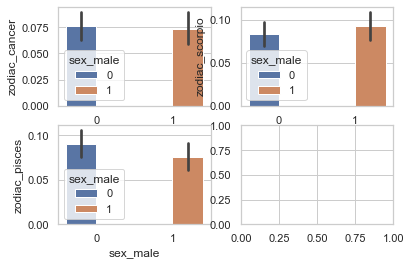

In [100]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

#create chart in each subplot
sns.barplot(data=train, x='sex_male', y='zodiac_cancer', ax=axes[0,0], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_scorpio', ax=axes[0,1], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_pisces', ax=axes[1,0], hue="sex_male")

### Air Signs:
- Gemini
- Libra
- Aquarius

<AxesSubplot:xlabel='sex_male', ylabel='zodiac_aquarius'>

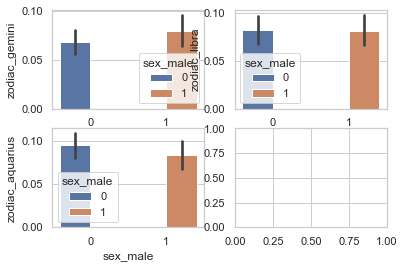

In [97]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

#create chart in each subplot
sns.barplot(data=train, x='sex_male', y='zodiac_gemini', ax=axes[0,0], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_libra', ax=axes[0,1], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_aquarius', ax=axes[1,0], hue="sex_male")

### Earth Signs:
- Taurus
- Virgo
- Capricorn

<AxesSubplot:xlabel='sex_male', ylabel='zodiac_capricorn'>

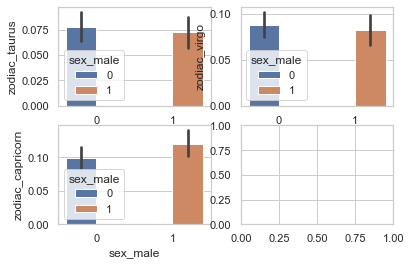

In [104]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

#create chart in each subplot
sns.barplot(data=train, x='sex_male', y='zodiac_taurus', ax=axes[0,0], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_virgo', ax=axes[0,1], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_capricorn', ax=axes[1,0], hue="sex_male")

_____________________________________________________________________________________

## Looking at the marital status percentages by Zodiac signs:

In [70]:
#percentage of divorced zodiacs
train.groupby('marital').zodiac.value_counts(normalize=True)['divorced']

zodiac
virgo                         0.10
scorpio                       0.10
pisces                        0.09
taurus                        0.09
leo                           0.09
aquarius                      0.08
sagittarius                   0.08
capricorn                     0.08
libra                         0.08
aries                         0.07
cancer                        0.07
gemini                        0.07
Name: zodiac, dtype: float64

In [71]:
#percentage of married zodiacs
train.groupby('marital').zodiac.value_counts(normalize=True)['married']

zodiac
capricorn                     0.12
sagittarius                   0.10
libra                         0.09
aquarius                      0.09
scorpio                       0.09
virgo                         0.08
leo                           0.08
pisces                        0.08
gemini                        0.07
taurus                        0.07
cancer                        0.07
aries                         0.06
Name: zodiac, dtype: float64

In [72]:
#percentage of never married zodiacs
train.groupby('marital').zodiac.value_counts(normalize=True)['never married']

zodiac
capricorn                     0.11
sagittarius                   0.09
pisces                        0.09
aquarius                      0.09
scorpio                       0.09
cancer                        0.08
leo                           0.08
gemini                        0.08
virgo                         0.08
libra                         0.07
taurus                        0.07
aries                         0.06
Name: zodiac, dtype: float64

In [73]:
#percentage of widowed zodiacs
train.groupby('marital').zodiac.value_counts(normalize=True)['widowed']

zodiac
aquarius                      0.12
capricorn                     0.11
leo                           0.10
aries                         0.08
taurus                        0.08
virgo                         0.08
libra                         0.08
pisces                        0.08
sagittarius                   0.07
scorpio                       0.07
gemini                        0.07
cancer                        0.06
Name: zodiac, dtype: float64

In [74]:
#percentage of widowed zodiacs
train.groupby('marital').zodiac.value_counts(normalize=True)['separated']

zodiac
capricorn                     0.14
aquarius                      0.12
leo                           0.12
cancer                        0.11
virgo                         0.11
pisces                        0.09
scorpio                       0.09
gemini                        0.07
aries                         0.05
sagittarius                   0.05
taurus                        0.05
Name: zodiac, dtype: float64

In [75]:
#percentages by each zodiac of marital status:
train.groupby('zodiac').marital.value_counts(normalize=True)

zodiac    marital      
aquarius  married                         0.48
          never married                   0.24
          divorced                        0.15
          widowed                         0.09
          separated                       0.03
                                  ...         
virgo     married                         0.47
          never married                   0.24
          divorced                        0.19
          widowed                         0.07
          separated                       0.03
Name: marital, Length: 62, dtype: float64

In [76]:
#aries
train.groupby('zodiac').marital.value_counts(normalize=True)['aries']

marital
married                         0.48
never married                   0.22
divorced                        0.19
widowed                         0.09
separated                       0.02
Name: marital, dtype: float64

In [77]:
train.groupby('zodiac').marital.value_counts(normalize=True)['taurus']

marital
married                         0.47
never married                   0.24
divorced                        0.20
widowed                         0.08
separated                       0.02
Name: marital, dtype: float64

In [78]:
train.groupby('zodiac').marital.value_counts(normalize=True)['gemini']

marital
married                         0.49
never married                   0.27
divorced                        0.15
widowed                         0.07
separated                       0.02
Name: marital, dtype: float64

In [79]:
train.groupby('zodiac').marital.value_counts(normalize=True)['cancer']

marital
married                         0.46
never married                   0.28
divorced                        0.16
widowed                         0.06
separated                       0.03
unknown                         0.01
Name: marital, dtype: float64

In [80]:
train.groupby('zodiac').marital.value_counts(normalize=True)['leo']

marital
married                         0.46
never married                   0.25
divorced                        0.17
widowed                         0.09
separated                       0.03
Name: marital, dtype: float64

In [81]:
train.groupby('zodiac').marital.value_counts(normalize=True)['virgo']

marital
married                         0.47
never married                   0.24
divorced                        0.19
widowed                         0.07
separated                       0.03
Name: marital, dtype: float64

In [82]:
train.groupby('zodiac').marital.value_counts(normalize=True)['libra']

marital
married                         0.56
never married                   0.22
divorced                        0.15
widowed                         0.07
Name: marital, dtype: float64

In [83]:
train.groupby('zodiac').marital.value_counts(normalize=True)['scorpio']

marital
married                         0.48
never married                   0.25
divorced                        0.18
widowed                         0.06
separated                       0.02
unknown                         0.00
Name: marital, dtype: float64

In [84]:
train.groupby('zodiac').marital.value_counts(normalize=True)['sagittarius']

marital
married                         0.52
never married                   0.26
divorced                        0.15
widowed                         0.06
separated                       0.01
Name: marital, dtype: float64

In [85]:
train.groupby('zodiac').marital.value_counts(normalize=True)['capricorn']

marital
married                         0.54
never married                   0.25
divorced                        0.11
widowed                         0.07
separated                       0.03
Name: marital, dtype: float64

In [86]:
train.groupby('zodiac').marital.value_counts(normalize=True)['aquarius']

marital
married                         0.48
never married                   0.24
divorced                        0.15
widowed                         0.09
separated                       0.03
Name: marital, dtype: float64

In [87]:
train.groupby('zodiac').marital.value_counts(normalize=True)['pisces']

marital
married                         0.45
never married                   0.27
divorced                        0.18
widowed                         0.07
separated                       0.02
unknown                         0.00
Name: marital, dtype: float64

_____________________________________________________________________________________________________

## Bivariate Statistics: Comparing variables to target (Zodiac signs):